<a href="https://colab.research.google.com/github/Pavithra777/GenerativeAI/blob/main/Basic_Generative_Adversarial_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch,pdb
from torch import nn
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.utils import make_grid
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

#Visualization function

1. The real image from the dataloader and the fake image from the generator should be shown.
2. A fully connected neural network is in use, with each possessing a single dimension.
3. The tensor is detached from the current computational graph to avoid the necessity of tracing it for gradient computation.
4. The single-dimensional tensor is resized to match the desired image dimensions.
5. A grid of images is created using the "make_grid" function from torchvision.
6. Typically, tensor images have dimensions such as BxCxHxW. To display them using matplotlib, these dimensions are rearranged as BxHxWxC.

In [ ]:
#Visualization function
def show(tensor,ch =1,size =(28,28),nums=16):
  # tensor dim --> 128 x 784
  data = tensor.detach().cpu().view(-1,ch,*size) # 128 x 784   ---> 128 x 1 x 28 x 28
  grid = make_grid(data[:nums],nrow=4).permute(1,2,0)
  plt.imshow(grid)
  plt.show()


**epochs**: The number of complete passes through the entire dataset during training.

**batch size**: The number of data points grouped into each batch for processing during training. This number determines the maximum number of images in each batch.

**cur_step**: Each step represents the training of one batch. Therefore, the total number of steps in each epoch is equal to the length of the dataloader divided by the batch size.

**mean_gen_loss**: The mean loss of the generator across multiple batches or iterations.

**mean_disc_loss**: The mean loss of the discriminator across multiple batches or iterations.

**z_dim**: The initial noise dimension, often used as the input for generating data in a generative model like a GAN (Generative Adversarial Network).

**lr**: The learning rate, which determines the step size in the gradient descent optimization algorithm. It affects how quickly the model's weights are updated during training.

**loss_func**: The loss function used for training the model. It quantifies the error or dissimilarity between the predicted values and the ground truth. Different tasks and models may require different loss functions.

**DataLoader** : Using the DataLoader class from torch.utils.data creates a data structure that provides iterable sets of data and labels.



**BCEWithLogitsLoss**

**BCEWithLogitsLoss**, which stands for **Binary Cross-Entropy with Logits Loss**, is a commonly used loss function in machine learning, particularly in **binary classification tasks**. It combines two important components: the **sigmoid function (logistic activation) and the binary cross-entropy loss.**

Here's a breakdown of how BCEWithLogitsLoss works:

**Logits**: Logits are the **raw, unnormalized scores or predictions** **produced by a model before applying any activation function** (such as sigmoid or softmax). In binary classification, there are typically two logits, one for each class (e.g., positive and negative classes). These logits can be positive or negative values.

**Sigmoid Activation**: The logits are passed through a sigmoid activation function. The sigmoid function **squashes the logits into the range [0, 1]**, effectively **converting them into probabilities**. It's used to model the probability that an input belongs to the positive class.

**Binary Cross-Entropy Loss**: After applying the sigmoid activation, the probabilities are compared to the actual binary labels (0 or 1). The binary cross-entropy loss measures the **dissimilarity between the predicted probabilities and the true labels**. It quantifies how well the model's predictions align with the ground truth.

The mathematical formula for the binary cross-entropy loss for a single example is:


**BCE(y, y') =  -[y * log(y') + (1 - y) * log(1 - y')] **

**y is the true binary label (0 or 1).**

**y' is the predicted probability (output of the sigmoid activation).**


*BCEWithLogitsLoss combines these steps into a single operation for computational efficiency. It accepts raw logits as input and internally applies the sigmoid activation and computes the binary cross-entropy loss. This is advantageous because it can help prevent numerical instability that can occur when directly computing the sigmoid and then the loss separately.*

In PyTorch, you can use BCEWithLogitsLoss as a loss function for binary classification tasks, often in conjunction with a model that uses sigmoid activation in its final layer. It's suitable for problems like spam detection, disease classification (sick or not sick), or any binary decision-making task.

In [ ]:
epochs =500
cur_step =0
info_step=300
mean_gen_loss = 0
mean_disc_loss = 0

z_dim =64
lr =0.00001
loss_func = nn.BCEWithLogitsLoss()

bs = 128
device = 'cuda'

dataloader = DataLoader(MNIST('.',download=True, transform = transforms.ToTensor()),shuffle=True, batch_size=bs )


100%|██████████| 9912422/9912422 [00:00<00:00, 165312293.71it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 100444190.57it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 46792861.86it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw




100%|██████████| 4542/4542 [00:00<00:00, 19069598.37it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



**Generator block**

This Generator block consists of a Linear layer, BatchNorm1D, and a ReLU activation function to introduce non-linearity.

nn.BatchNorm1d is a PyTorch class found in its neural network module (nn) used for implementing Batch Normalization in one-dimensional data.

The Generator class utilizes the gen function to create a generator block.

This function takes noise as input.

the parameters of the Generator class include the noise dimension, image dimension, and hidden layer dimension.

The neural network starts with the noise dimension and gradually increases it to the image dimension.

A Linear layer is applied before the activation function, which increases the dimension to the image dimension.

In the last layer, a Sigmoid activation function is used instead of ReLU to prevent negative values from being discarded.

**Discriminator**

1. A discriminator block has Linear layer and LeakyReLU activation function

2. Discriminator class gets fake image as input

3. Other input parameters of discriminator class are image dimension and hidden layer dimension

4. In the neural network dimension is reduced from image dimension to single scalar vlaue because it just distinguish its a real or fake image.


Here's why **the discriminator block doesn't have Batch Normalization and uses LeakyReLU instead of ReLU**:

**Batch Normalization (BatchNorm)**: BatchNorm is typically used in the generator network to stabilize training by normalizing the input to each layer. It helps ensure that the intermediate activations have a consistent distribution, which can be beneficial when generating data. **In the discriminator, BatchNorm is not commonly used because it can hinder the network's ability to differentiate real data from generated data. The discriminator's goal is to be more critical and sensitive to differences between real and fake data, so introducing BatchNorm could smooth out these differences.**

**Activation Function (LeakyReLU):** LeakyReLU is a variant of the Rectified Linear Unit (ReLU) activation function. **It allows a small, non-zero gradient when the input is negative**. This small gradient helps to address the vanishing gradient problem during training. In the discriminator, **LeakyReLU is often preferred because it allows the discriminator to capture more nuanced differences between real and fake data. It prevents the discriminator from becoming too confident in its predictions, leading to more stable and effective training.**

In summary, the discriminator's role is to distinguish between real and fake data, and it benefits from the use of LeakyReLU instead of ReLU to provide better gradient flow during training. Batch Normalization is generally not used in the discriminator to maintain its sensitivity to small differences between real and fake data distributions. These design choices are made to improve the overall performance of the GAN.







In [ ]:
def genBlock(inp,out):
  return nn.Sequential(
      nn.Linear(inp,out),
      nn.BatchNorm1d(out),
      nn.ReLU(inplace=True),
  )

class Generator(nn.Module):
  def __init__(self,z_dim=64,i_dim=784,h_dim=128):
    super().__init__()
    self.gen = nn.Sequential(
        genBlock(z_dim,h_dim),
        genBlock(h_dim, 2 * h_dim),
        genBlock(2 * h_dim , 4 * h_dim),
        genBlock(4 * h_dim , 8 * h_dim),
        nn.Linear(8 * h_dim , i_dim),
        nn.Sigmoid(),
    )

  def forward(self,noise):
    return self.gen(noise)

def gen_noise(number,z_dim):
  return torch.randn(number,z_dim).to(device)

def discBlock(inp,out):
  return nn.Sequential(
      nn.Linear(inp,out),
      nn.LeakyReLU(0.2)
      )

class Discriminator(nn.Module):
  def __init__(self,i_dim=784,h_dim=256):
    super().__init__()
    self.disc = nn.Sequential(
        discBlock(i_dim,h_dim *4),
        discBlock(4 * h_dim, 2 * h_dim),
        discBlock(2 * h_dim , h_dim),
        nn.Linear(h_dim , 1),

    )

  def forward(self,image):
    return self.disc(image)



**Backpropagation and Optimization**:

During training, the neural network learns by iteratively adjusting its weights and biases to minimize the loss function. This process is known as backpropagation.

Optimization algorithms such as Gradient Descent or its variants are used to update the weights and biases in the direction that reduces the loss.

The gradients of the loss with respect to the network's weights and biases are computed using backpropagation.

The optimization algorithm adjusts the weights and biases to minimize the loss.

In [ ]:
gen = Generator(z_dim).to(device)
gen_optim = torch.optim.Adam(gen.parameters(),lr)
disc =  Discriminator().to(device)
disc_optim =torch.optim.Adam(disc.parameters(),lr)

In [ ]:
x,y = next(iter(dataloader))

In [ ]:
y[:10]

tensor([5, 9, 5, 0, 0, 2, 0, 4, 8, 3])

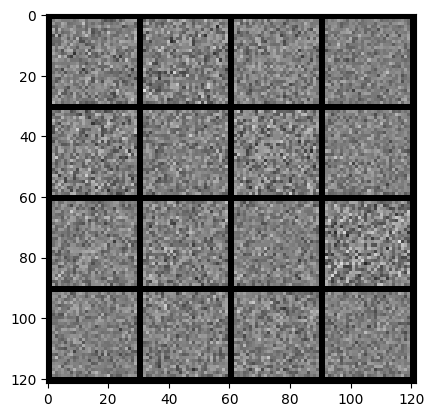

In [ ]:
noise = gen_noise(bs,z_dim)
fake = gen(noise)
show(fake)

**Generator Loss Calculation**

1. The Generator creates a fake image using random noise as input.

2. This fake image is then passed to the Discriminator.

3. The Discriminator's job is to distinguish between real images (assigned label  and fake images (assigned label 0).

4. To train the Generator effectively, it aims to fool the Discriminator into believing that the fake image is a real image. To do this, the target for the Generator is a tensor of ones, with the same dimensions as the fake image. This means that each pixel of the fake image should convincingly resemble a real image pixel.

5. The output of the Discriminator, along with the target tensor, is then passed to the loss function for computation. The loss function quantifies how well the Generator is performing in generating realistic-looking images, guiding its training process.




Calculate Discriminator loss

There are two loss in discriminator , loss with fake image and loss with real image.
Discriminator loss is the average of these two losses.

Discriminator loss with fake image is calculated with output of discriminator with fake image and tensor of zeros with same dimension as image.

Discriminator loss with real image is calculated with output of discriminator with real image and tensor of ones with same dimension as image.



In [ ]:
def calc_gen_loss(loss_func,gen,disc,number,z_dim):
  noise = gen_noise(number,z_dim)
  fake = gen(noise)
  pred=disc(fake)
  targets = torch.ones_like(pred)
  gen_loss= loss_func(pred,targets)
  return gen_loss

def calc_disc_loss(loss_func,gen,disc,number,z_dim,real):
  noise = gen_noise(number,z_dim)
  fake = gen(noise)
  disc_fake =disc(fake.detach())
  fake_targets = torch.zeros_like(disc_fake)
  disc_fake_loss= loss_func(disc_fake,fake_targets)

  disc_real =disc(real)
  real_targets = torch.ones_like(disc_real)
  disc_real_loss= loss_func(disc_real,real_targets)

  disc_loss = (disc_fake_loss + disc_real_loss)/2
  return disc_loss



**Zeroing the gradients** is a crucial step when training neural networks, including both the Generator and Discriminator in a GAN. Here's why it's done:

**Gradient Accumulation**: During each training iteration (forward and backward pass), gradients of the model parameters are computed with respect to the loss. These gradients are accumulated by the framework (e.g., PyTorch or TensorFlow) in the .grad attribute of each parameter. If you don't zero the gradients at the start of each iteration, **the gradients from the previous iteration would** **still be present.**

**Gradient Update**: Gradients are used to update the model parameters during the optimization step (e.g., using gradient descent or one of its variants). If you don't zero the gradients, the new gradients will be added to the existing ones from the previous iteration. **This can lead to incorrect updates and erratic behavior during training.**

**Preventing Gradient Explosion**: In some cases, **gradients can become very large (known as gradient explosion)**, especially in deep networks. Zeroing the gradients at the start of each iteration helps prevent this issue, ensuring that the gradients are initialized to zero before accumulating new values.

**Separate Batche**s: In mini-batch training (which is common in deep learning), **you process one batch of data at a time. Zeroing the gradients at the start of each batch ensures that the gradients are specific to the current batch and don't interfere with gradients from previous batches.**

  0%|          | 0/469 [00:00<?, ?it/s]

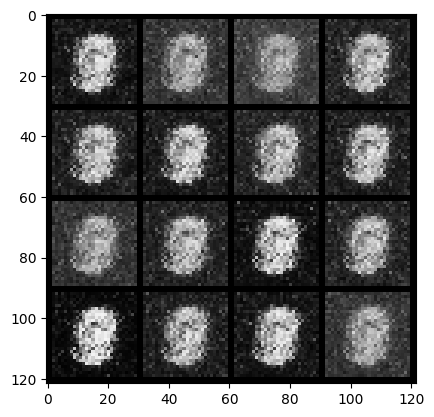

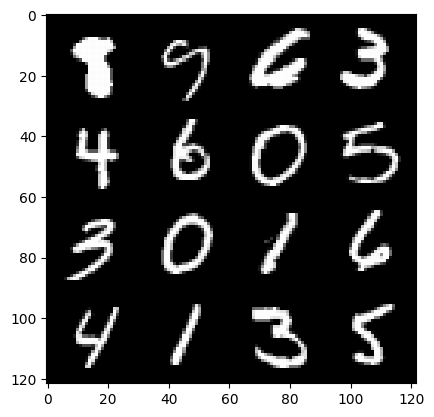

epoch : 0 | step : 300 | Gen loss : 2.1176565827925993 | Disc loss : 0.3288914253314338


  0%|          | 0/469 [00:00<?, ?it/s]

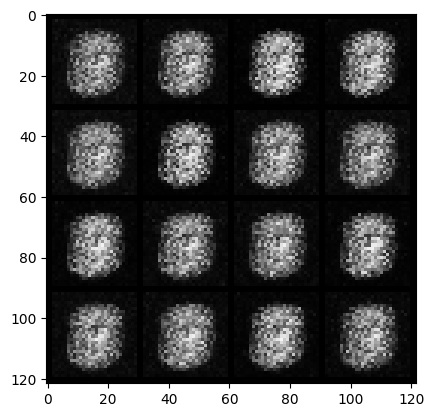

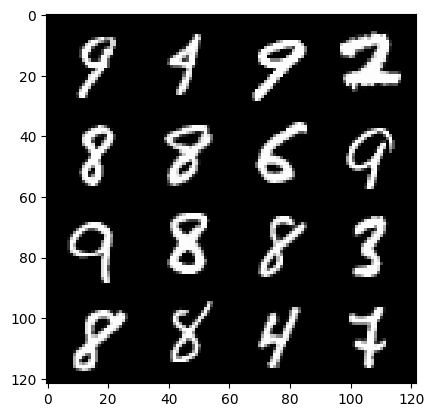

epoch : 1 | step : 600 | Gen loss : 3.7735675279299414 | Disc loss : 0.10730622306466099


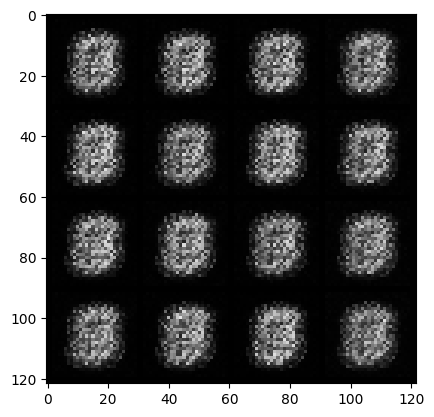

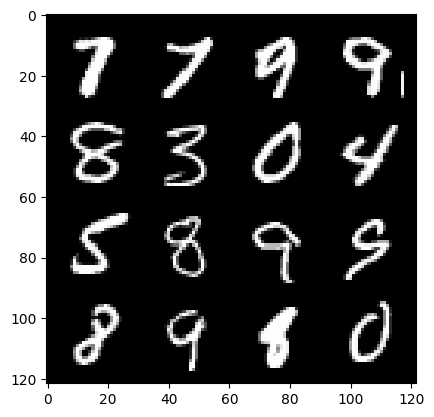

epoch : 1 | step : 900 | Gen loss : 3.6885550832748417 | Disc loss : 0.04751348945001762


  0%|          | 0/469 [00:00<?, ?it/s]

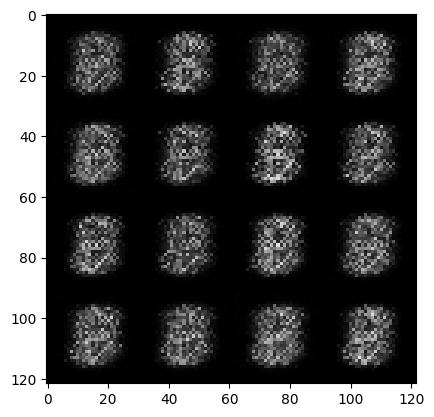

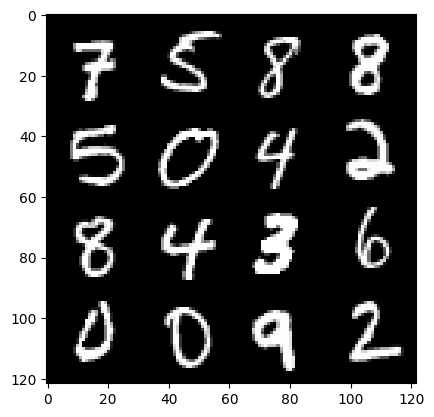

epoch : 2 | step : 1200 | Gen loss : 3.614313977559405 | Disc loss : 0.03411696715901297


  0%|          | 0/469 [00:00<?, ?it/s]

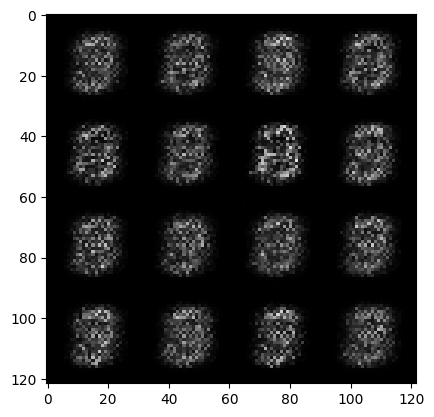

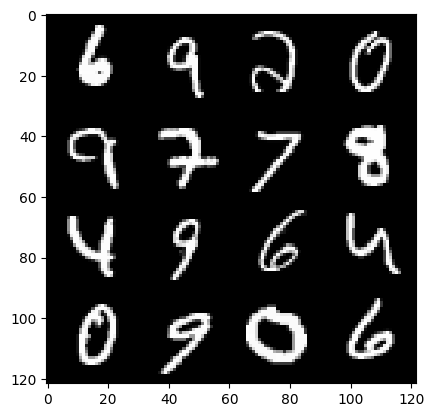

epoch : 3 | step : 1500 | Gen loss : 3.433850393295289 | Disc loss : 0.04147588516275089


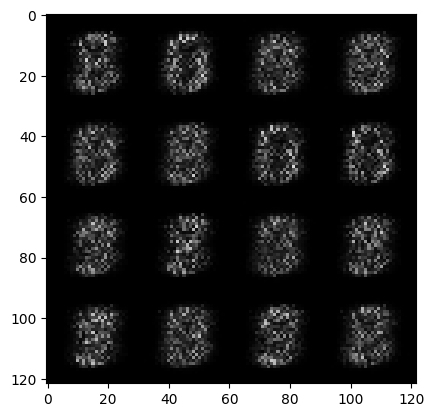

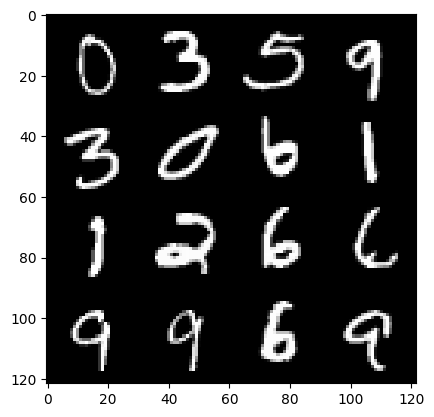

epoch : 3 | step : 1800 | Gen loss : 3.3457738455136607 | Disc loss : 0.04986155236760773


  0%|          | 0/469 [00:00<?, ?it/s]

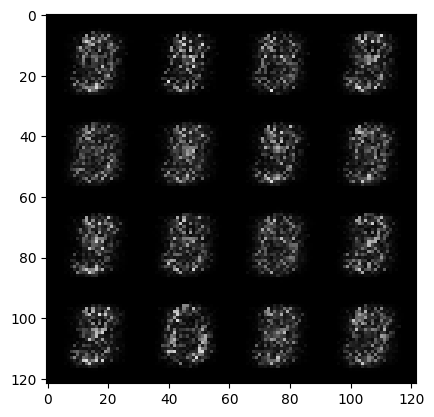

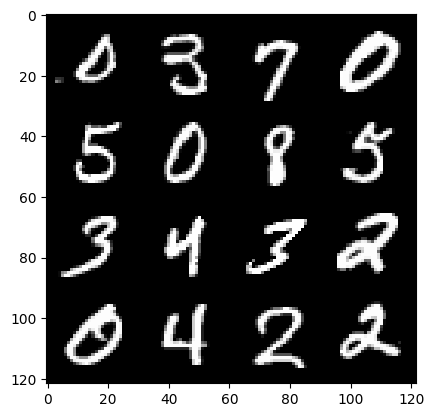

epoch : 4 | step : 2100 | Gen loss : 3.649556945959724 | Disc loss : 0.04251461930572985


  0%|          | 0/469 [00:00<?, ?it/s]

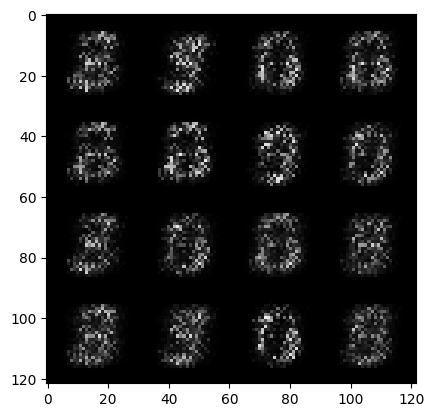

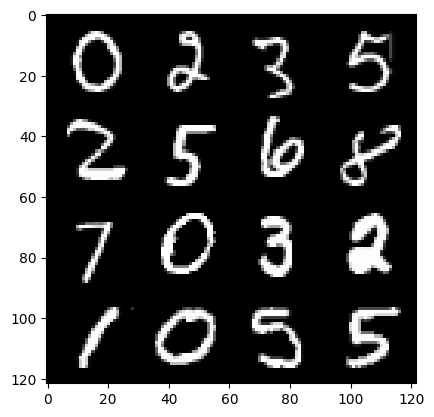

epoch : 5 | step : 2400 | Gen loss : 4.0471113260587055 | Disc loss : 0.03324383499100803


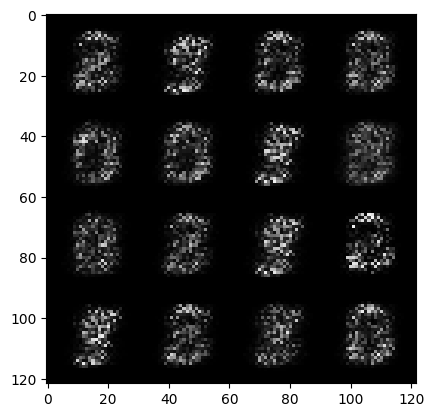

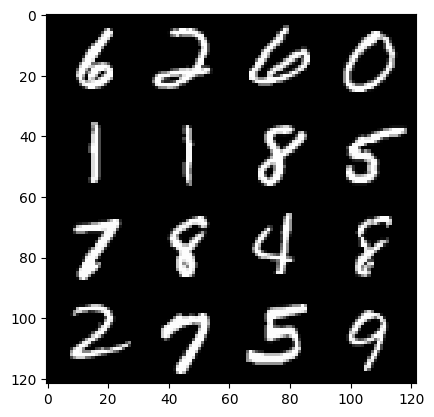

epoch : 5 | step : 2700 | Gen loss : 4.463503611882526 | Disc loss : 0.025603892120222245


  0%|          | 0/469 [00:00<?, ?it/s]

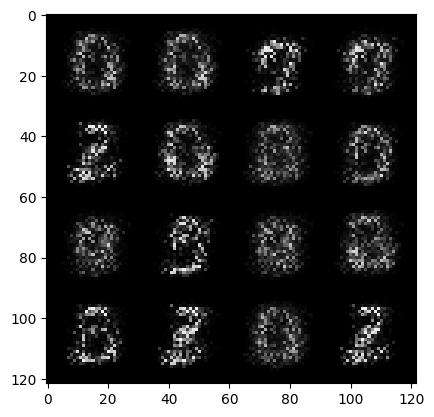

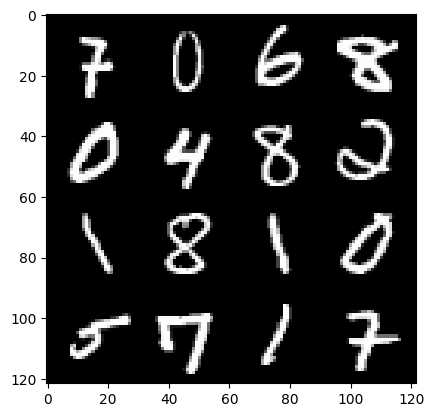

epoch : 6 | step : 3000 | Gen loss : 4.844879271189376 | Disc loss : 0.022483720369637


  0%|          | 0/469 [00:00<?, ?it/s]

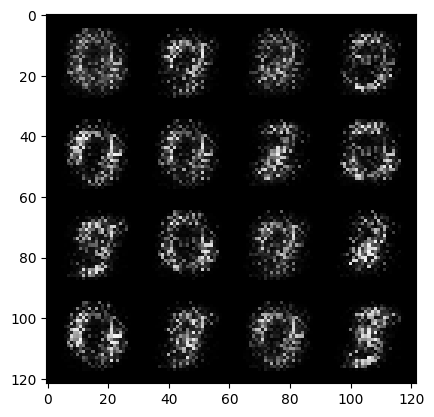

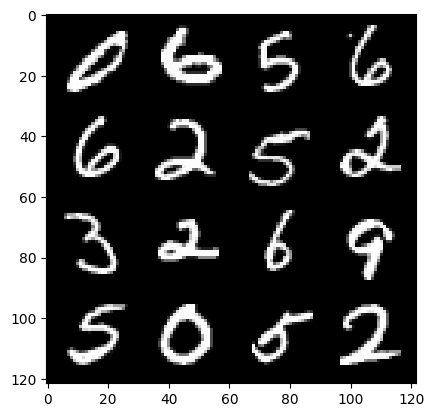

epoch : 7 | step : 3300 | Gen loss : 5.008207055727637 | Disc loss : 0.021407648775105665


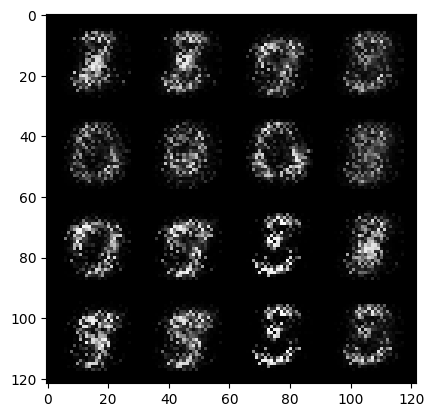

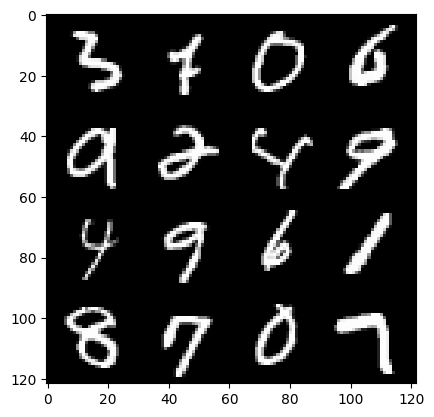

epoch : 7 | step : 3600 | Gen loss : 5.46845067501068 | Disc loss : 0.019604591652750972


  0%|          | 0/469 [00:00<?, ?it/s]

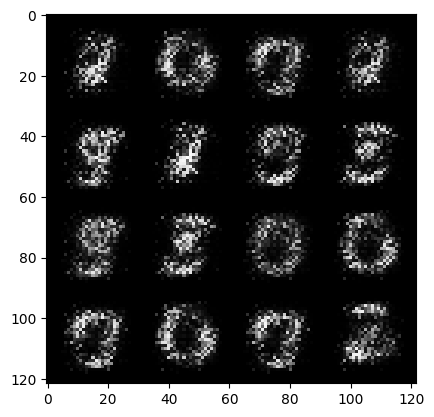

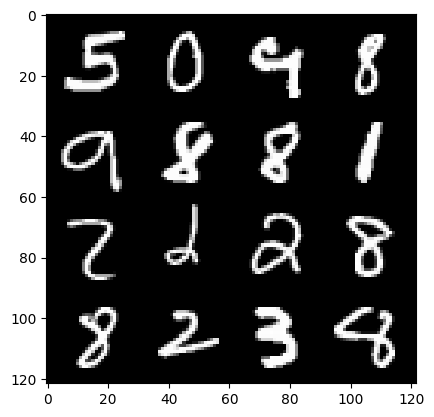

epoch : 8 | step : 3900 | Gen loss : 5.665853848457339 | Disc loss : 0.018983713349637887


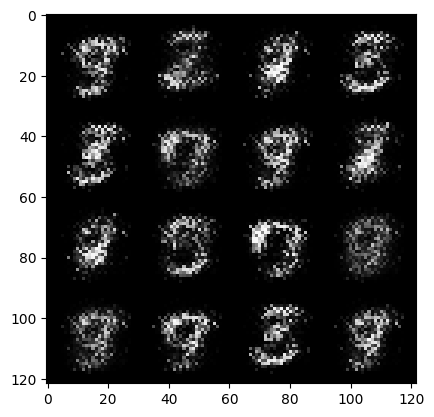

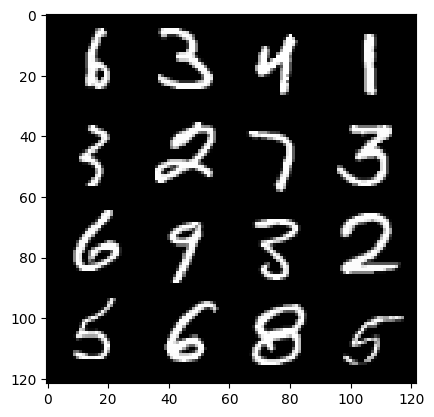

epoch : 8 | step : 4200 | Gen loss : 5.841378378868109 | Disc loss : 0.016130731442632766


  0%|          | 0/469 [00:00<?, ?it/s]

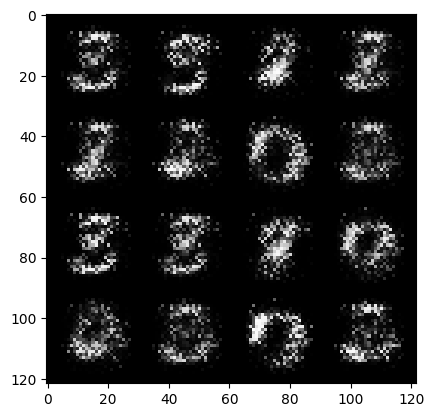

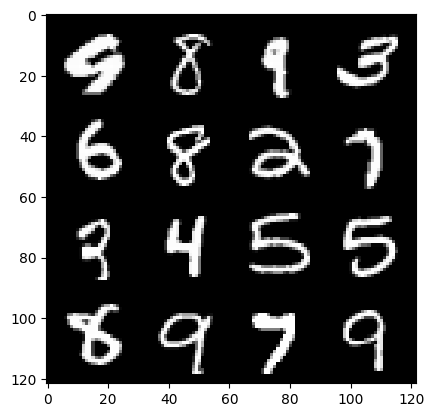

epoch : 9 | step : 4500 | Gen loss : 5.819109503428141 | Disc loss : 0.014560548303027958


  0%|          | 0/469 [00:00<?, ?it/s]

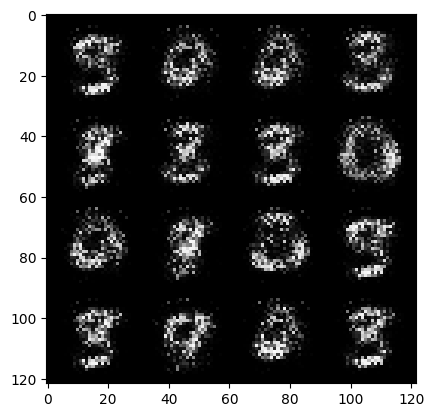

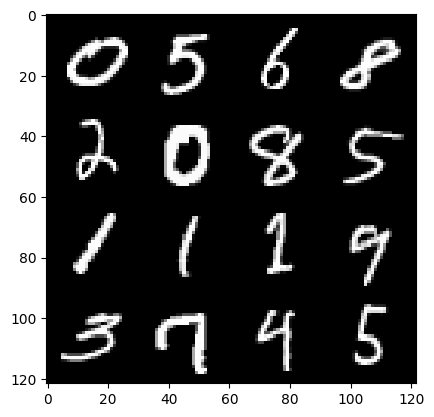

epoch : 10 | step : 4800 | Gen loss : 6.112647868792216 | Disc loss : 0.012207301047941039


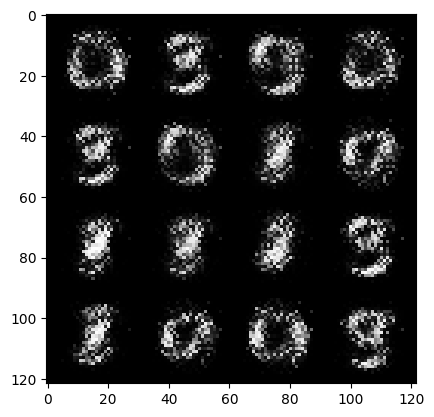

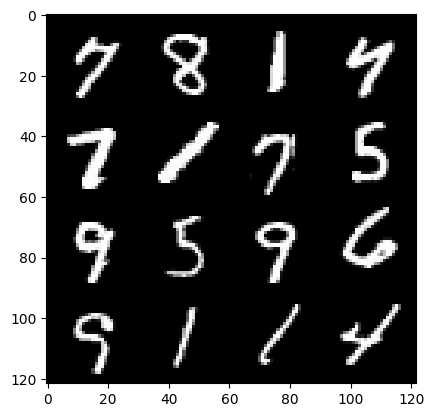

epoch : 10 | step : 5100 | Gen loss : 6.223541994094847 | Disc loss : 0.012806477965787053


  0%|          | 0/469 [00:00<?, ?it/s]

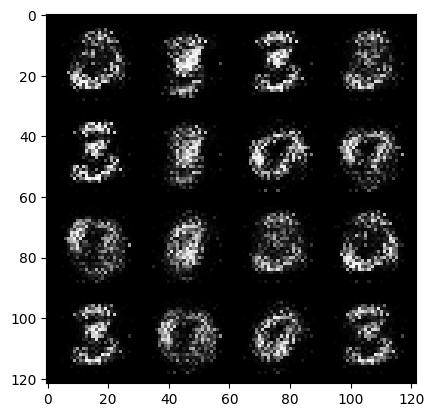

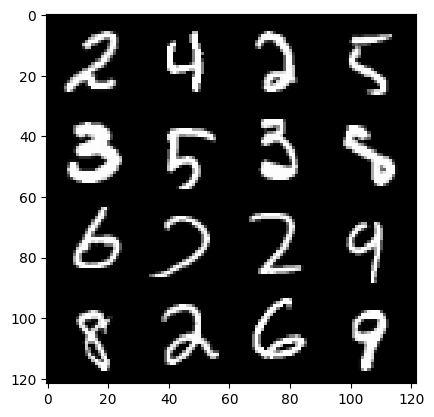

epoch : 11 | step : 5400 | Gen loss : 6.574336687723793 | Disc loss : 0.012787232700114464


  0%|          | 0/469 [00:00<?, ?it/s]

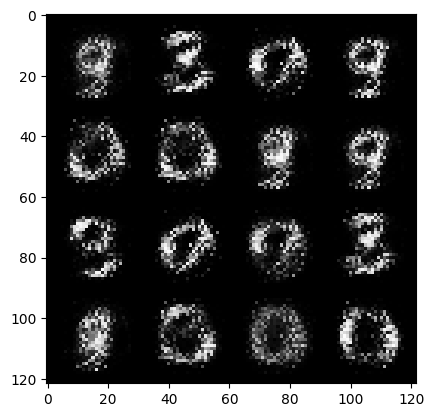

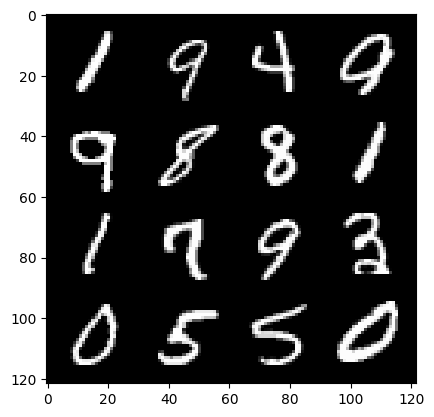

epoch : 12 | step : 5700 | Gen loss : 6.10333273410797 | Disc loss : 0.016010046562490356


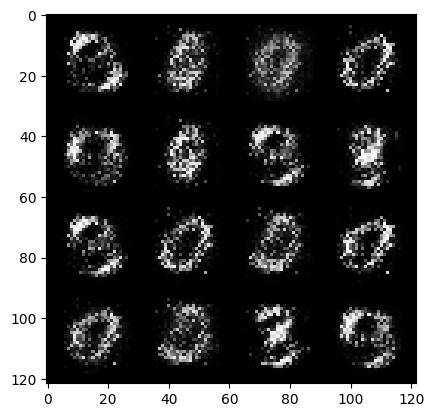

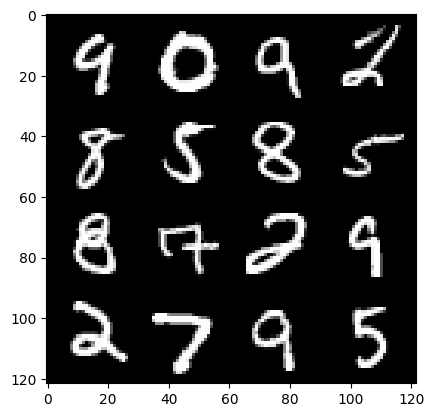

epoch : 12 | step : 6000 | Gen loss : 6.436077113151552 | Disc loss : 0.01276160651119427


  0%|          | 0/469 [00:00<?, ?it/s]

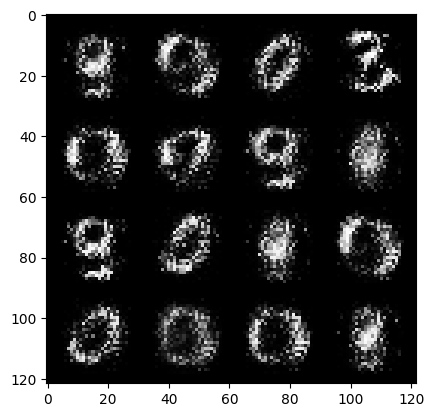

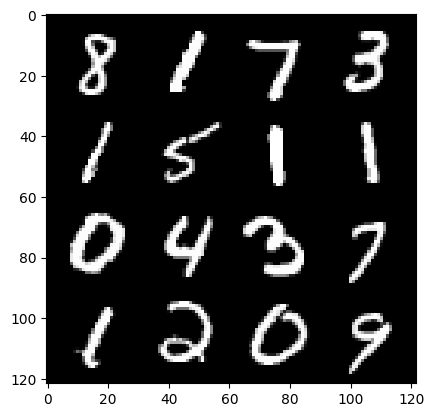

epoch : 13 | step : 6300 | Gen loss : 6.467326650619502 | Disc loss : 0.013245263147788731


  0%|          | 0/469 [00:00<?, ?it/s]

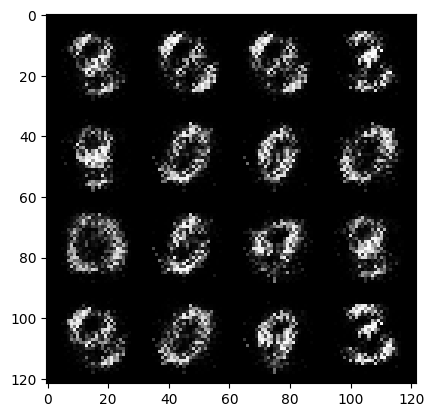

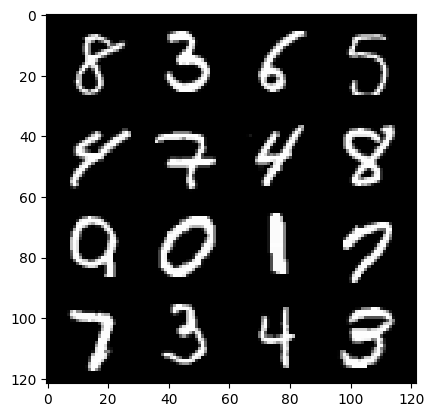

epoch : 14 | step : 6600 | Gen loss : 6.815745334625243 | Disc loss : 0.01213429436630881


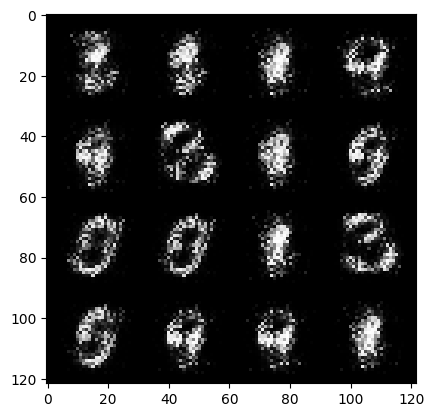

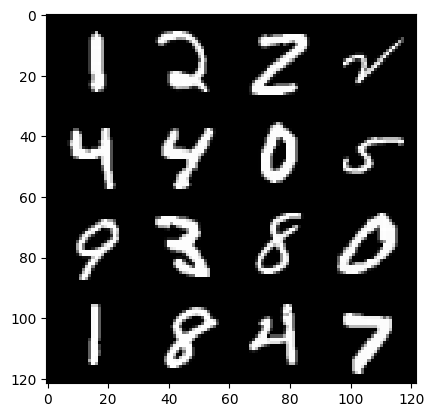

epoch : 14 | step : 6900 | Gen loss : 6.822064119974776 | Disc loss : 0.011706682105238238


  0%|          | 0/469 [00:00<?, ?it/s]

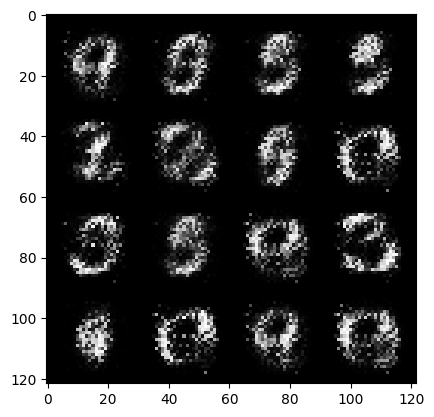

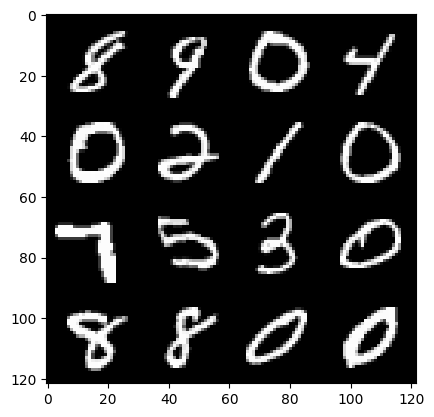

epoch : 15 | step : 7200 | Gen loss : 6.378425779342654 | Disc loss : 0.014980328714785492


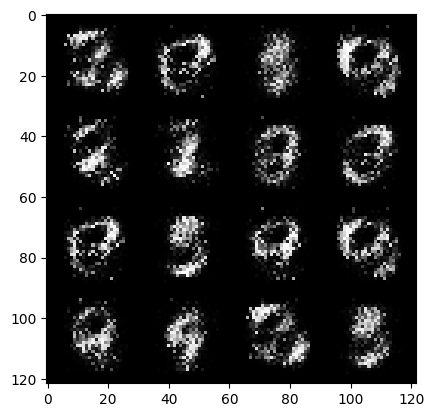

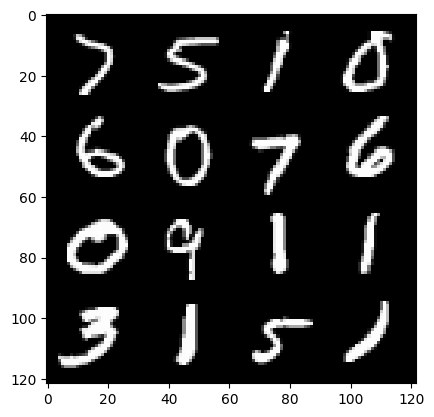

epoch : 15 | step : 7500 | Gen loss : 6.394498939514166 | Disc loss : 0.013001396586963289


  0%|          | 0/469 [00:00<?, ?it/s]

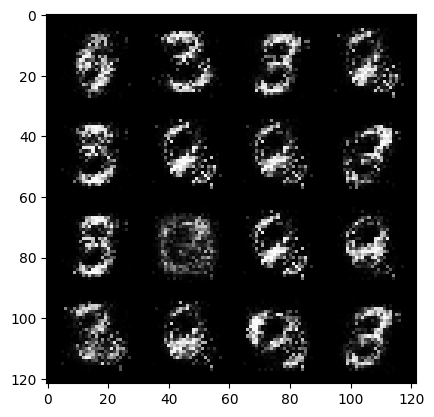

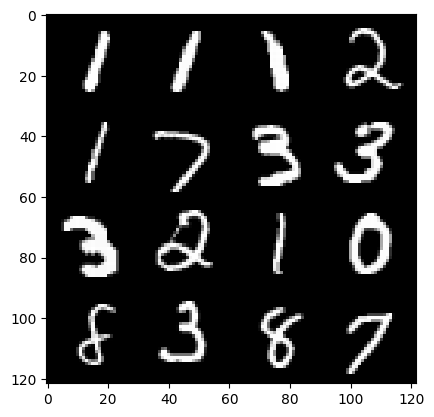

epoch : 16 | step : 7800 | Gen loss : 6.813188069661461 | Disc loss : 0.011355666156547766


  0%|          | 0/469 [00:00<?, ?it/s]

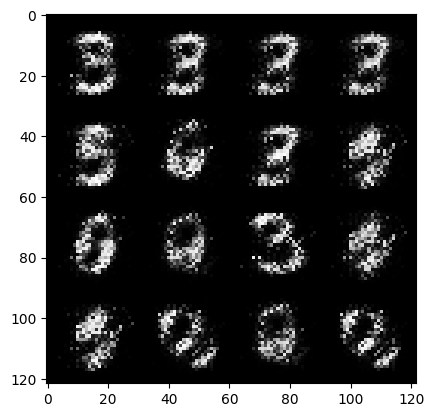

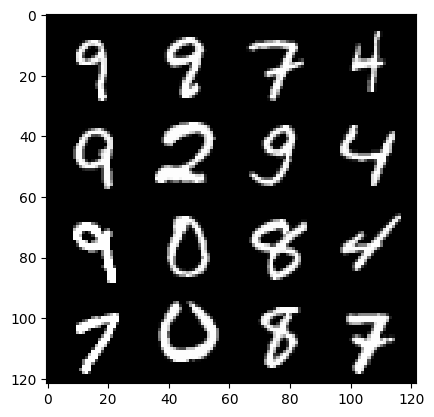

epoch : 17 | step : 8100 | Gen loss : 6.869132930437719 | Disc loss : 0.01155791557471579


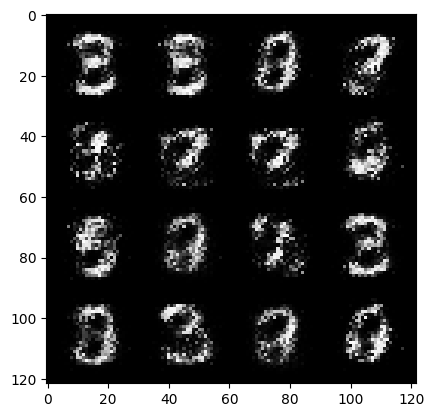

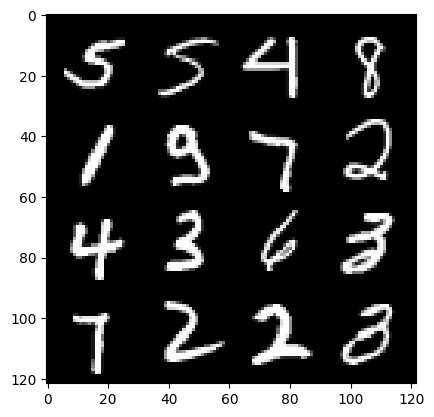

epoch : 17 | step : 8400 | Gen loss : 7.083784670829776 | Disc loss : 0.010992732034064838


  0%|          | 0/469 [00:00<?, ?it/s]

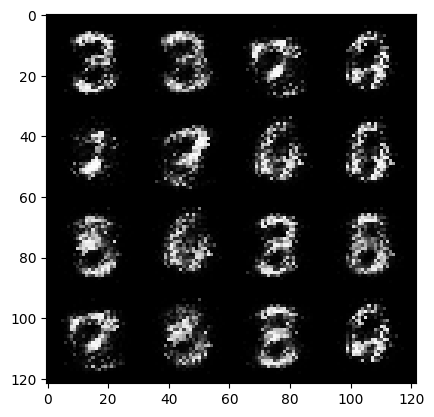

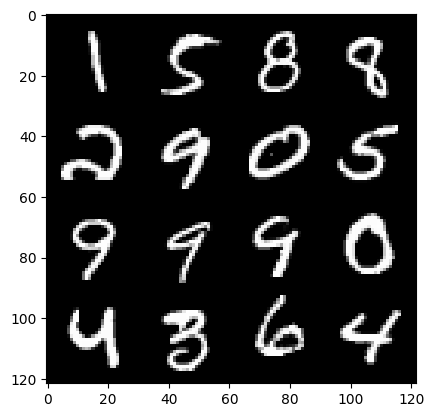

epoch : 18 | step : 8700 | Gen loss : 6.950864286422728 | Disc loss : 0.01171288341671849


  0%|          | 0/469 [00:00<?, ?it/s]

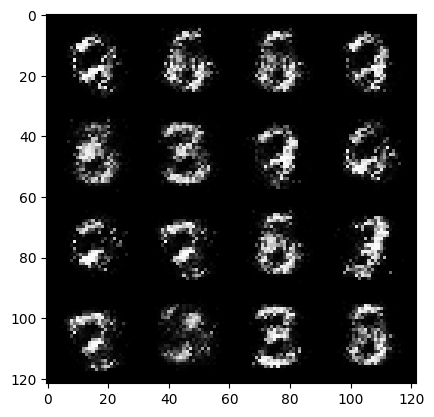

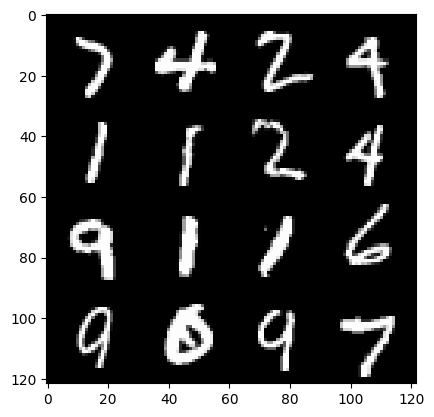

epoch : 19 | step : 9000 | Gen loss : 6.585880735715227 | Disc loss : 0.016156461443752046


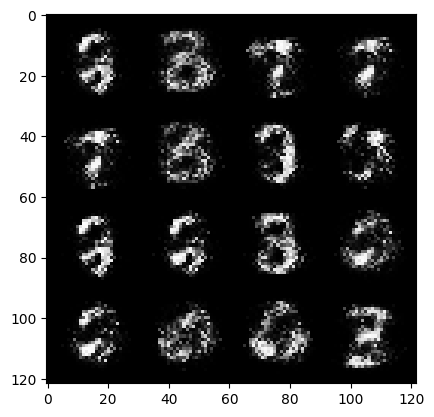

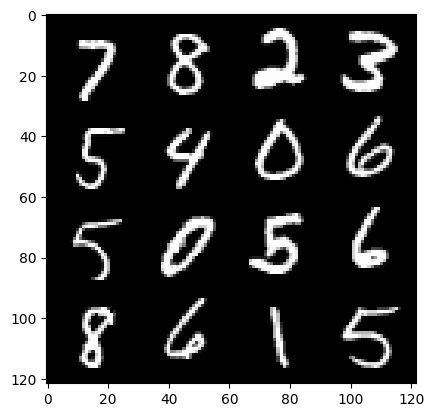

epoch : 19 | step : 9300 | Gen loss : 6.338047568003334 | Disc loss : 0.017481901647212594


  0%|          | 0/469 [00:00<?, ?it/s]

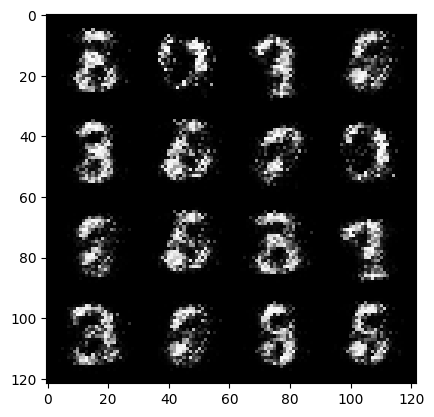

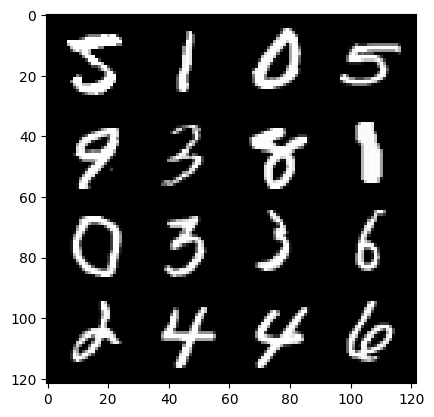

epoch : 20 | step : 9600 | Gen loss : 6.473417210578923 | Disc loss : 0.020144192269071933


  0%|          | 0/469 [00:00<?, ?it/s]

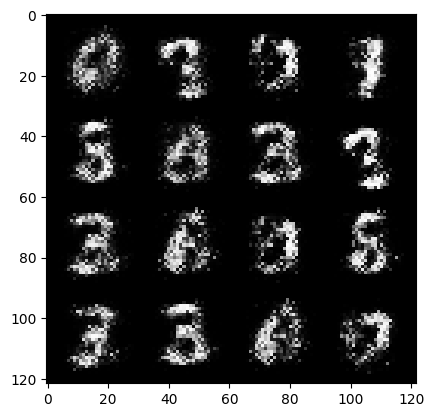

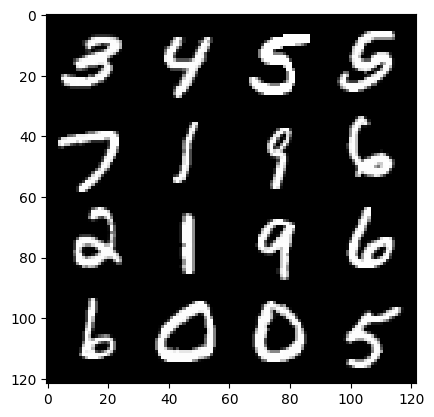

epoch : 21 | step : 9900 | Gen loss : 6.615641514460249 | Disc loss : 0.018213420640677214


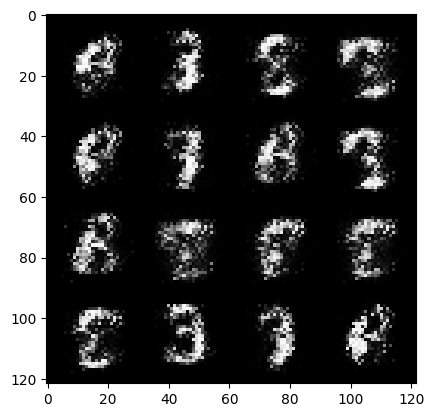

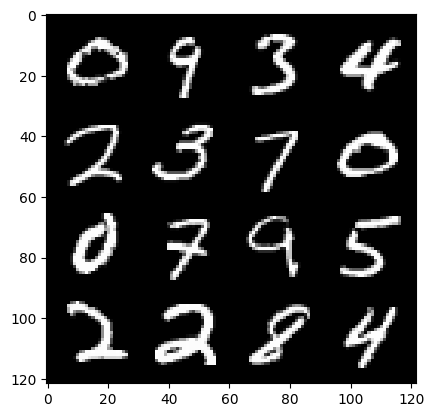

epoch : 21 | step : 10200 | Gen loss : 6.278549378712972 | Disc loss : 0.016763367204306007


  0%|          | 0/469 [00:00<?, ?it/s]

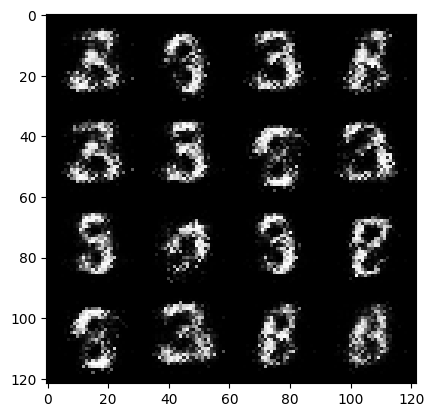

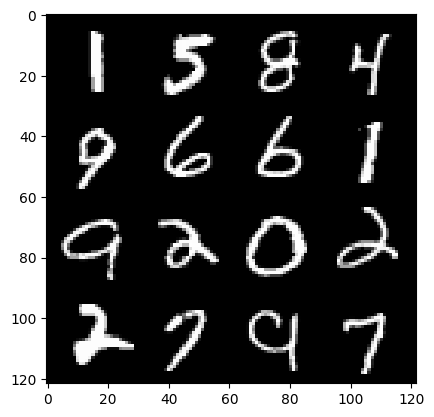

epoch : 22 | step : 10500 | Gen loss : 6.4063282982508385 | Disc loss : 0.015485042201665536


  0%|          | 0/469 [00:00<?, ?it/s]

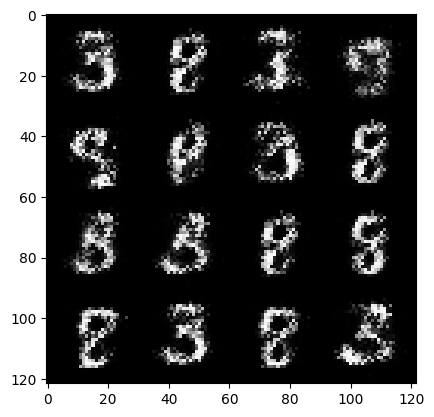

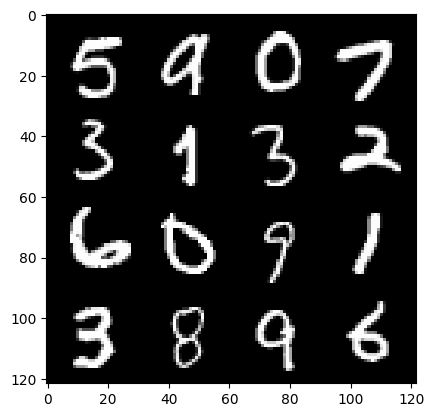

epoch : 23 | step : 10800 | Gen loss : 6.432080229123429 | Disc loss : 0.015045392266474663


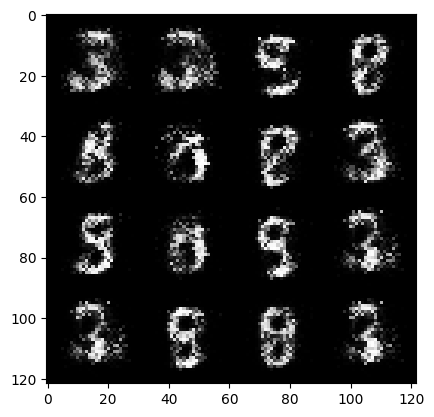

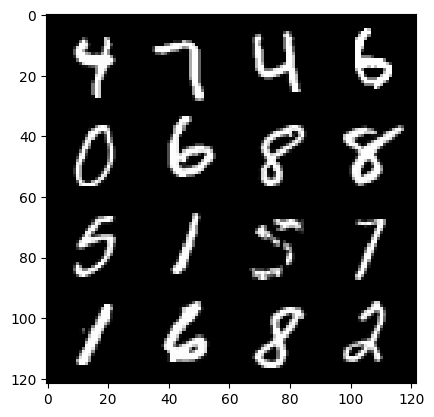

epoch : 23 | step : 11100 | Gen loss : 6.626939328511561 | Disc loss : 0.01614151248785978


  0%|          | 0/469 [00:00<?, ?it/s]

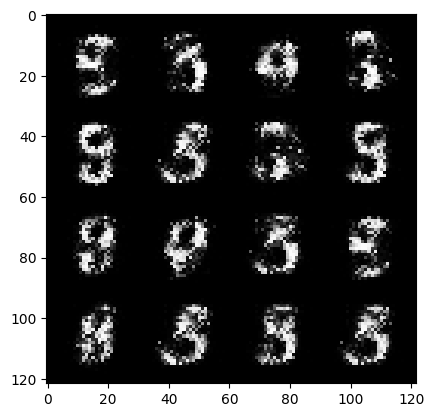

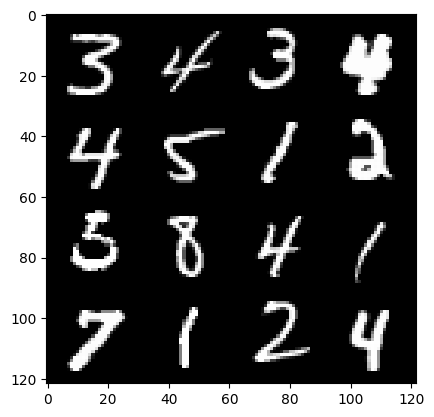

epoch : 24 | step : 11400 | Gen loss : 6.483139246304834 | Disc loss : 0.01889581754027555


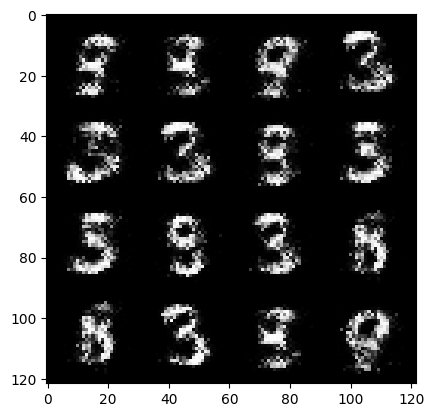

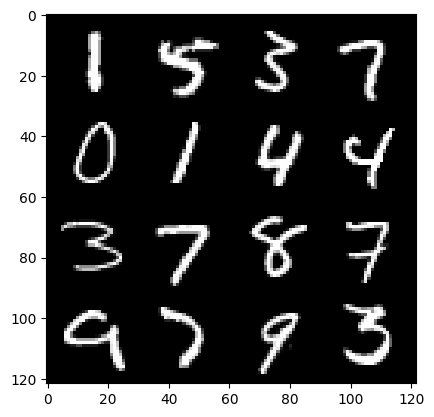

epoch : 24 | step : 11700 | Gen loss : 6.317487327257794 | Disc loss : 0.018036246993578968


  0%|          | 0/469 [00:00<?, ?it/s]

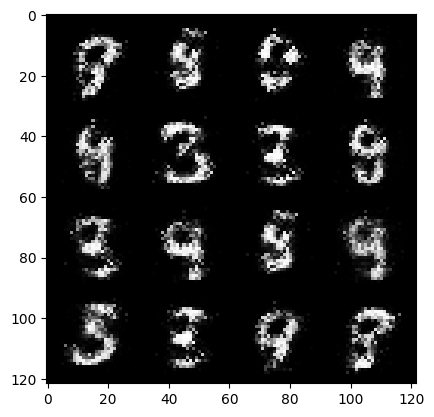

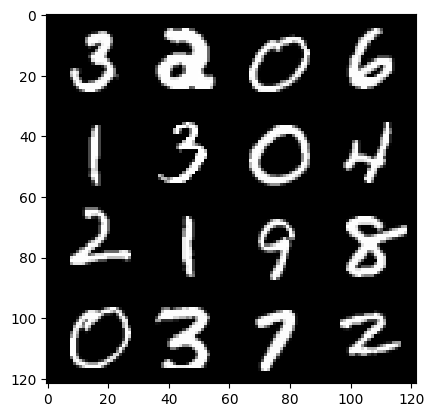

epoch : 25 | step : 12000 | Gen loss : 6.8019420337677 | Disc loss : 0.015450372934186194


  0%|          | 0/469 [00:00<?, ?it/s]

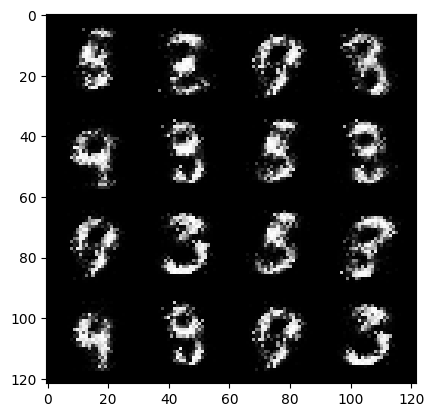

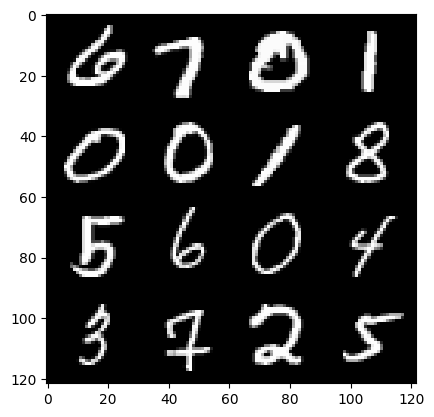

epoch : 26 | step : 12300 | Gen loss : 6.385790437062575 | Disc loss : 0.017957195245350426


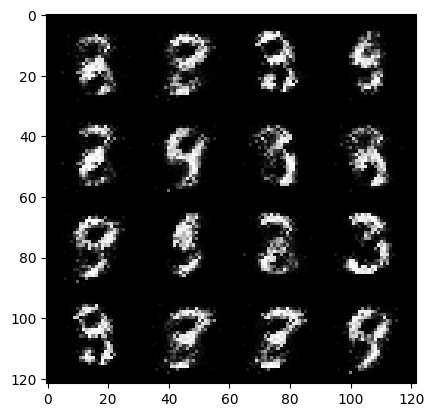

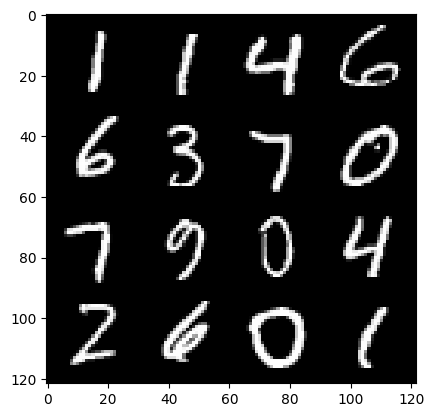

epoch : 26 | step : 12600 | Gen loss : 6.1133426046371415 | Disc loss : 0.017666293445508924


  0%|          | 0/469 [00:00<?, ?it/s]

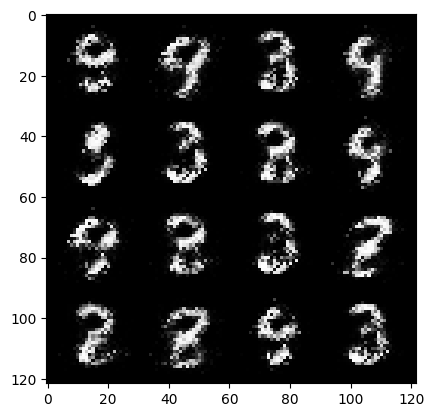

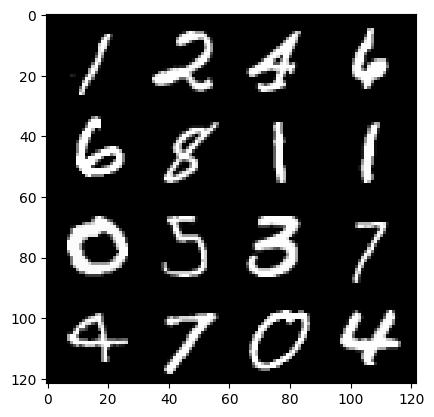

epoch : 27 | step : 12900 | Gen loss : 6.108441273371382 | Disc loss : 0.017555504061747346


  0%|          | 0/469 [00:00<?, ?it/s]

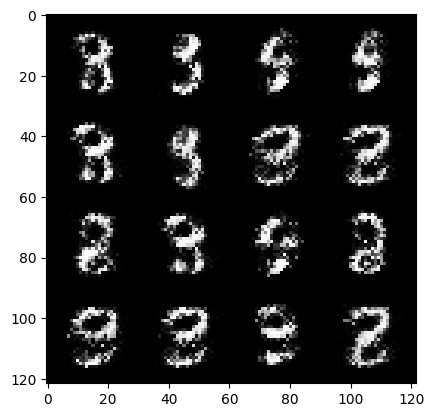

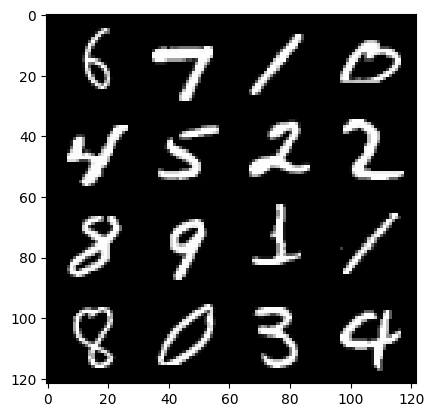

epoch : 28 | step : 13200 | Gen loss : 6.111049116452536 | Disc loss : 0.020124151289152577


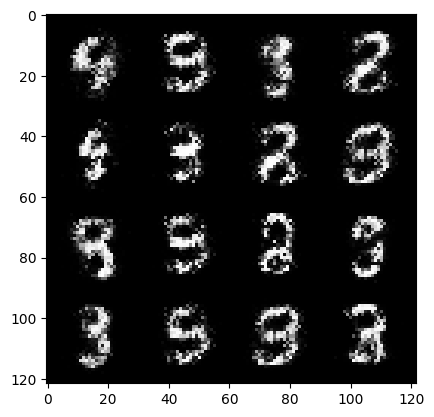

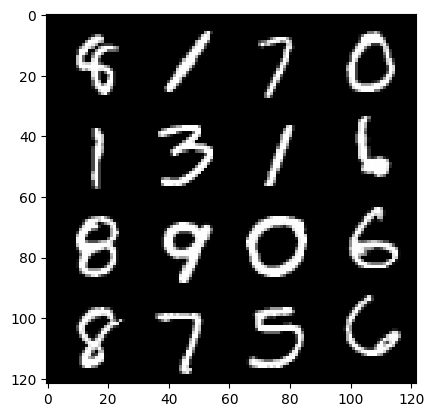

epoch : 28 | step : 13500 | Gen loss : 6.209331644376118 | Disc loss : 0.018781495699658986


  0%|          | 0/469 [00:00<?, ?it/s]

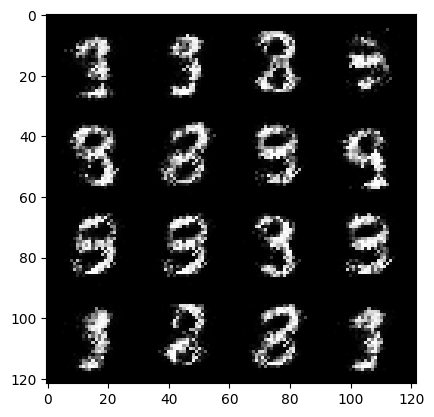

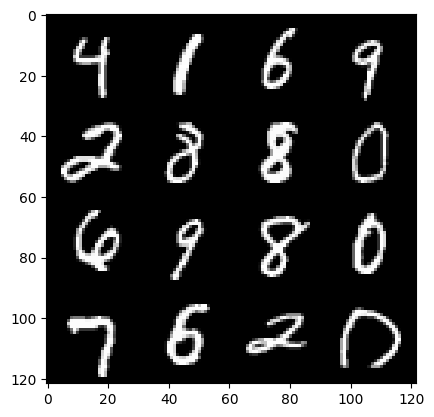

epoch : 29 | step : 13800 | Gen loss : 5.758280278841657 | Disc loss : 0.020587764104517813


  0%|          | 0/469 [00:00<?, ?it/s]

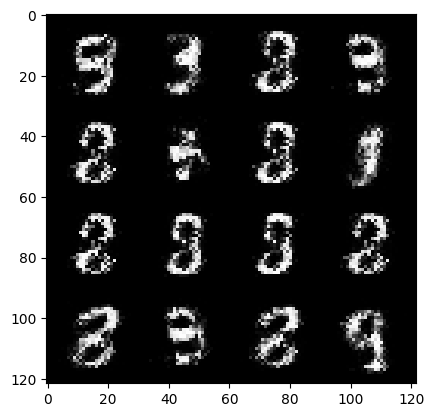

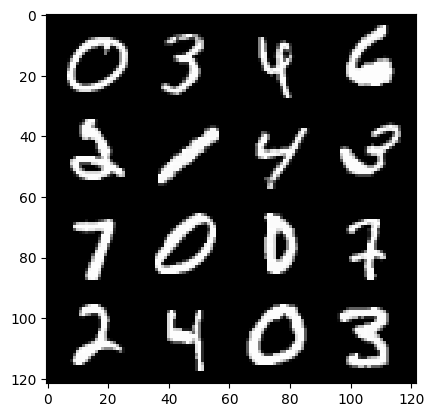

epoch : 30 | step : 14100 | Gen loss : 6.111191937128705 | Disc loss : 0.021669577974826115


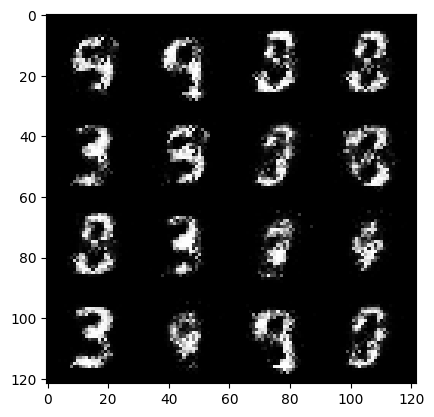

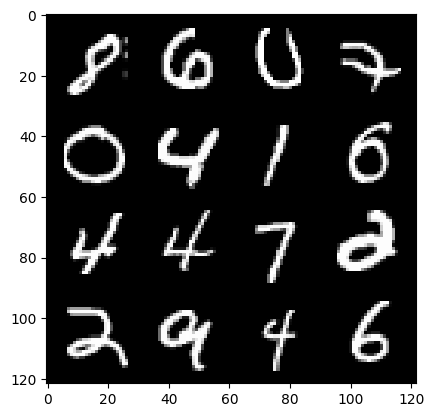

epoch : 30 | step : 14400 | Gen loss : 6.013862233161927 | Disc loss : 0.019758972669175517


  0%|          | 0/469 [00:00<?, ?it/s]

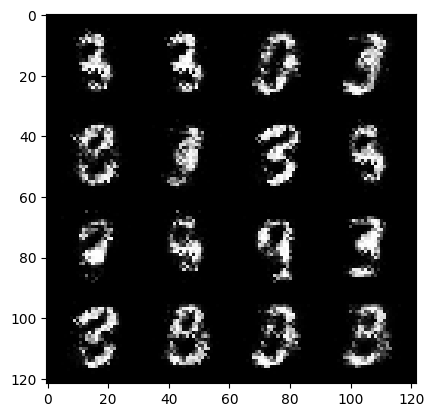

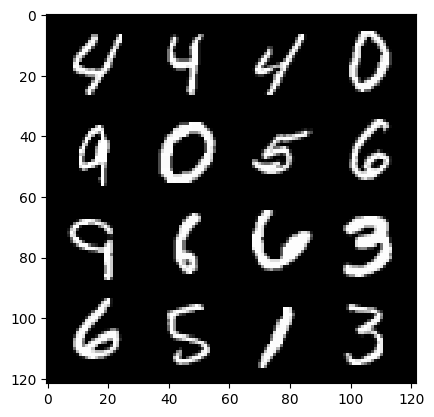

epoch : 31 | step : 14700 | Gen loss : 5.896071949005126 | Disc loss : 0.020337330529776727


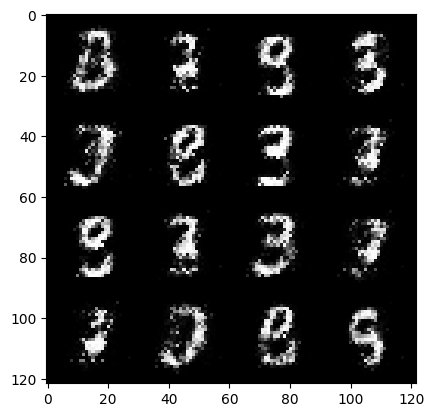

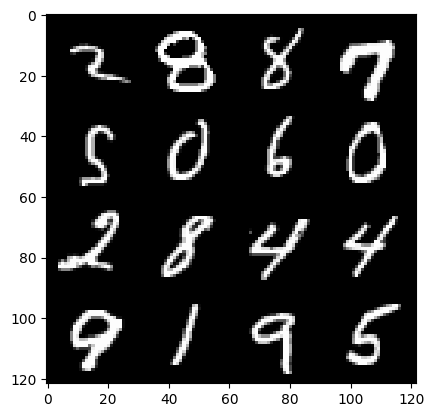

epoch : 31 | step : 15000 | Gen loss : 6.253952782948815 | Disc loss : 0.020296972969081235


  0%|          | 0/469 [00:00<?, ?it/s]

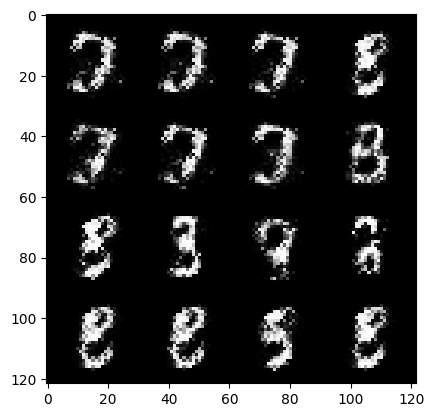

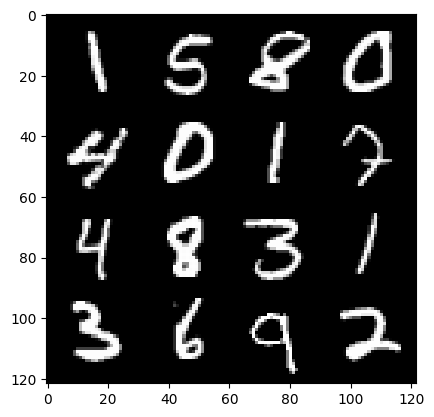

epoch : 32 | step : 15300 | Gen loss : 6.080994822184247 | Disc loss : 0.022702164731454103


  0%|          | 0/469 [00:00<?, ?it/s]

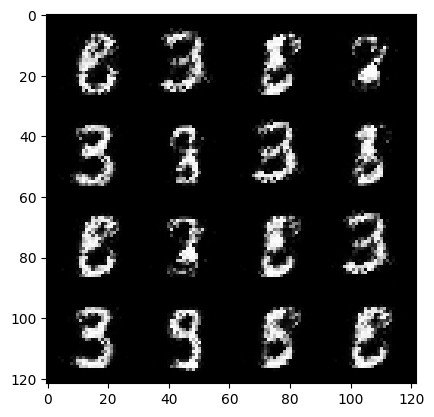

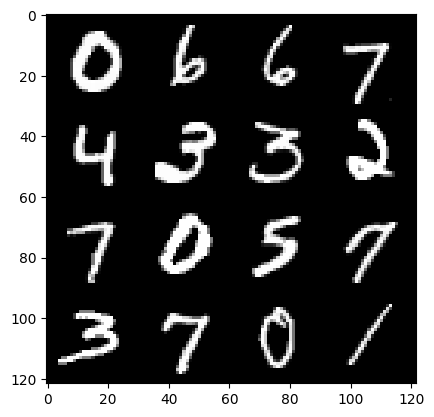

epoch : 33 | step : 15600 | Gen loss : 5.890890321731563 | Disc loss : 0.02148306892175849


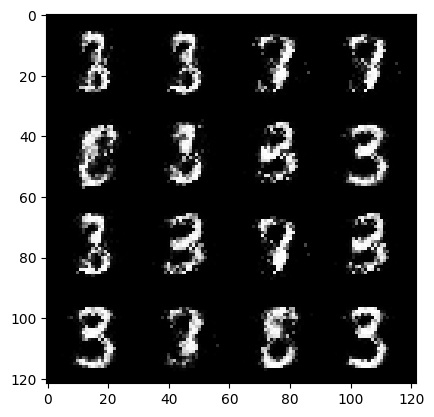

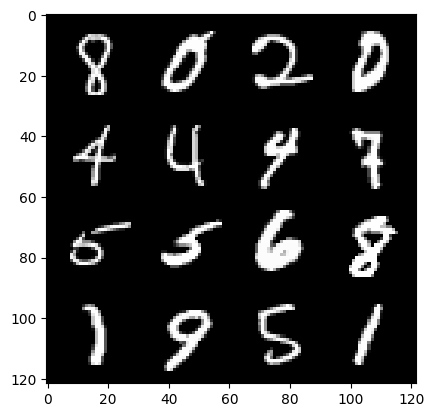

epoch : 33 | step : 15900 | Gen loss : 6.025908772150675 | Disc loss : 0.020009034516600275


  0%|          | 0/469 [00:00<?, ?it/s]

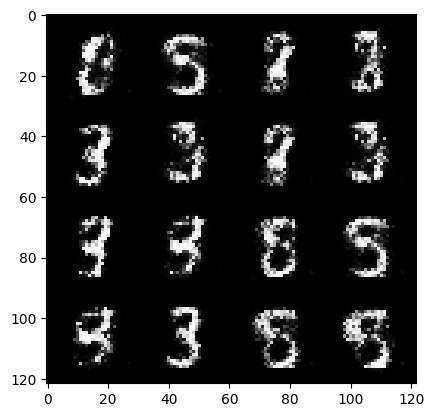

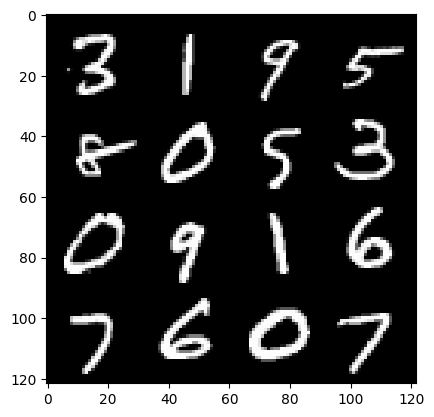

epoch : 34 | step : 16200 | Gen loss : 5.934968194961548 | Disc loss : 0.025730245357068866


  0%|          | 0/469 [00:00<?, ?it/s]

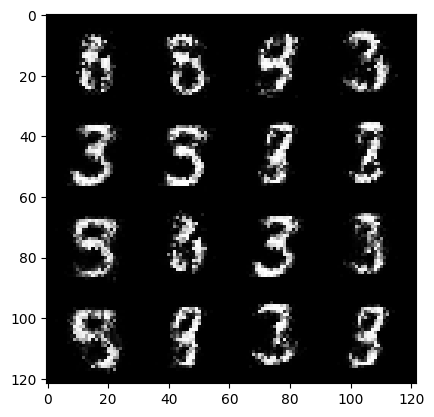

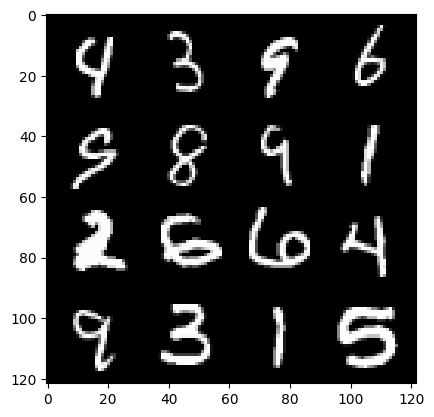

epoch : 35 | step : 16500 | Gen loss : 5.672022094726557 | Disc loss : 0.03387879701176038


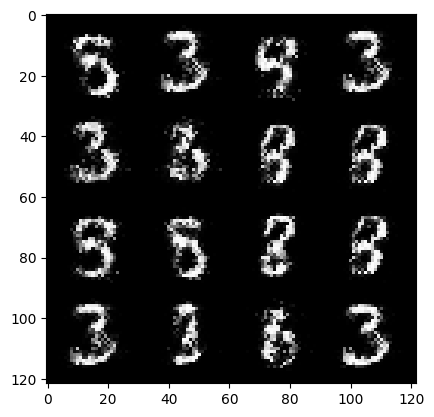

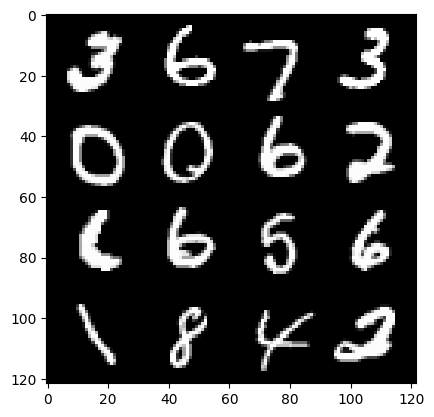

epoch : 35 | step : 16800 | Gen loss : 5.7198363908131835 | Disc loss : 0.02996245012773822


  0%|          | 0/469 [00:00<?, ?it/s]

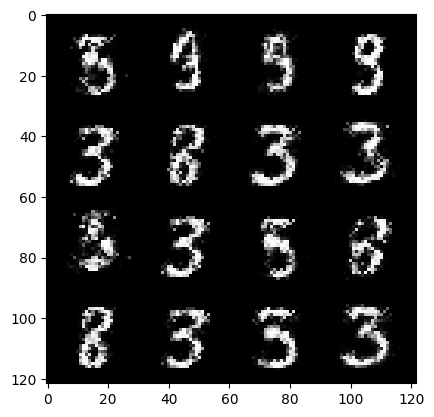

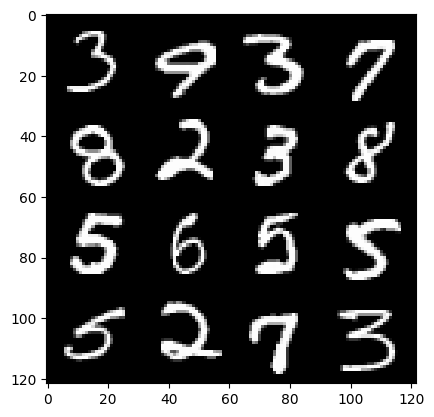

epoch : 36 | step : 17100 | Gen loss : 5.893115669886273 | Disc loss : 0.026897244805780568


  0%|          | 0/469 [00:00<?, ?it/s]

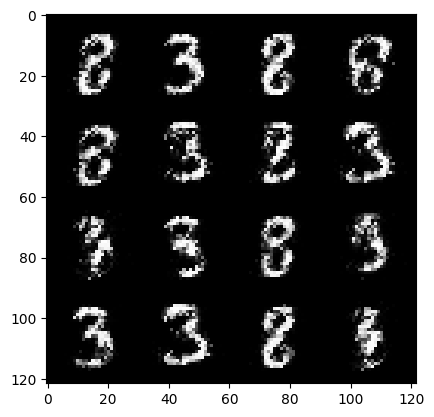

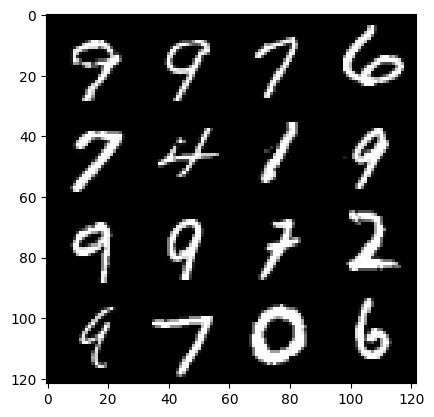

epoch : 37 | step : 17400 | Gen loss : 5.8759237066904655 | Disc loss : 0.026883748167504842


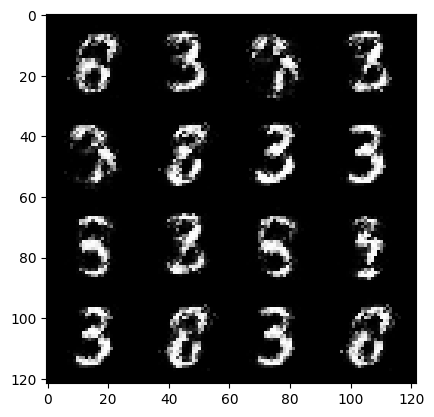

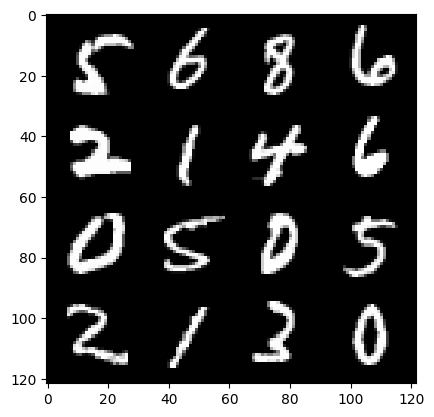

epoch : 37 | step : 17700 | Gen loss : 5.860586964289342 | Disc loss : 0.02997323982572803


  0%|          | 0/469 [00:00<?, ?it/s]

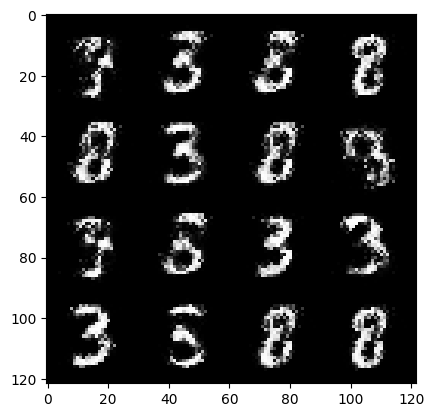

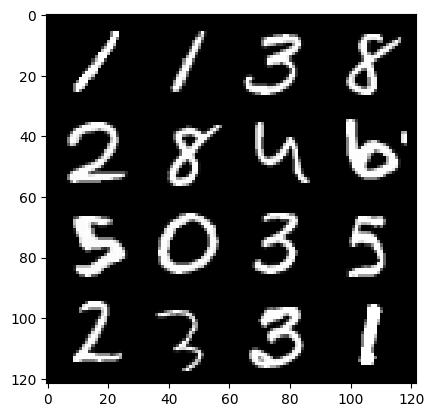

epoch : 38 | step : 18000 | Gen loss : 5.868359467188514 | Disc loss : 0.032464567550147545


  0%|          | 0/469 [00:00<?, ?it/s]

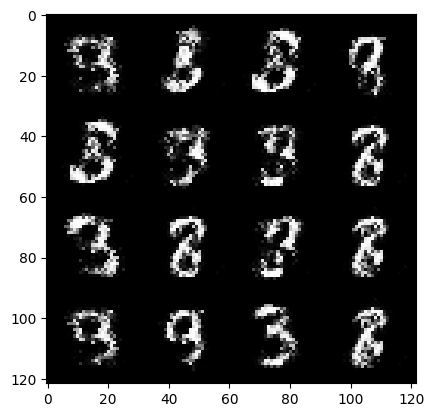

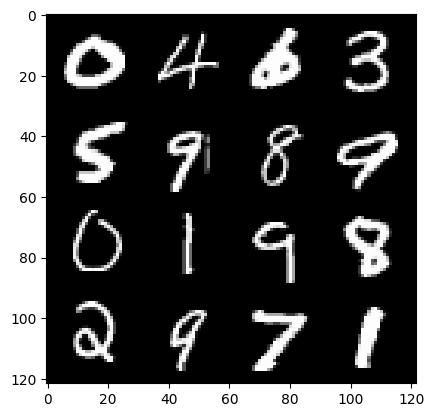

epoch : 39 | step : 18300 | Gen loss : 6.159821316401165 | Disc loss : 0.03599585353396834


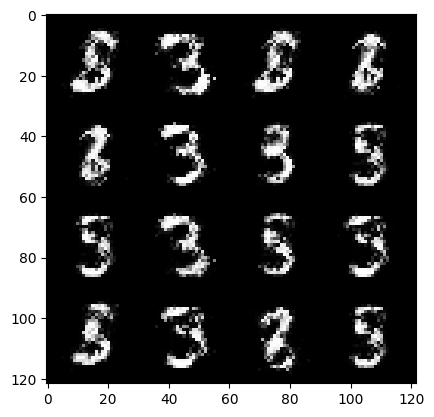

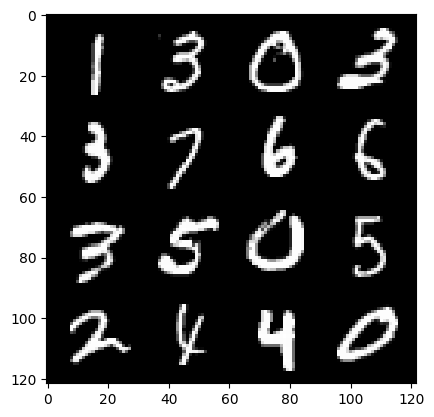

epoch : 39 | step : 18600 | Gen loss : 5.972933516502378 | Disc loss : 0.02775172748913366


  0%|          | 0/469 [00:00<?, ?it/s]

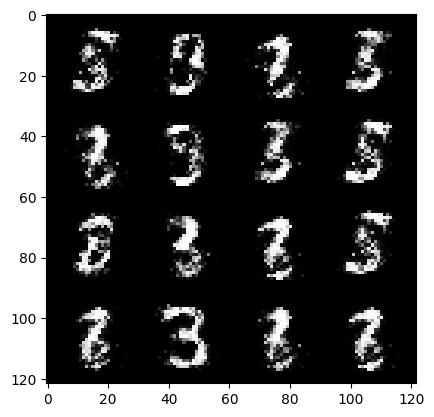

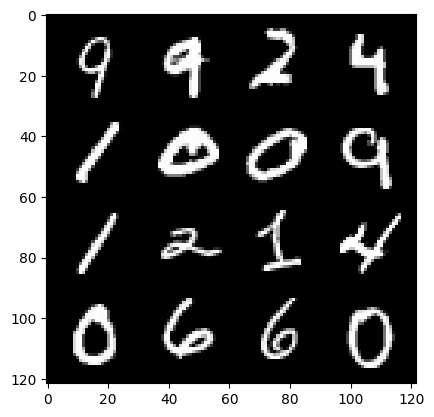

epoch : 40 | step : 18900 | Gen loss : 5.628030222256977 | Disc loss : 0.030538998786360027


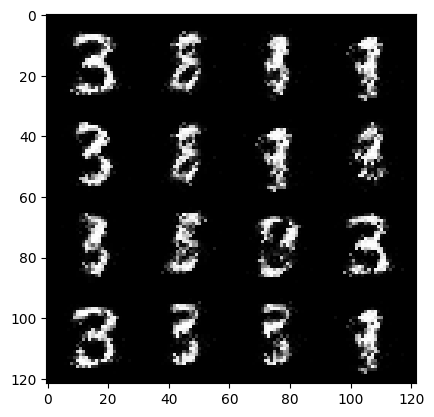

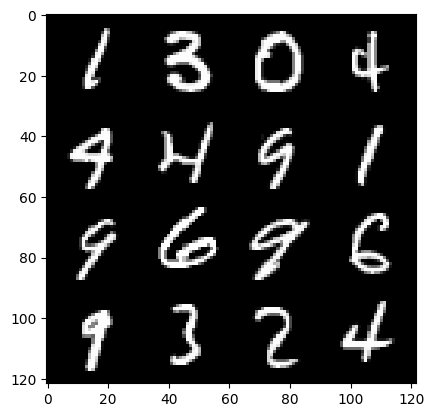

epoch : 40 | step : 19200 | Gen loss : 5.937682927449548 | Disc loss : 0.03036270731439195


  0%|          | 0/469 [00:00<?, ?it/s]

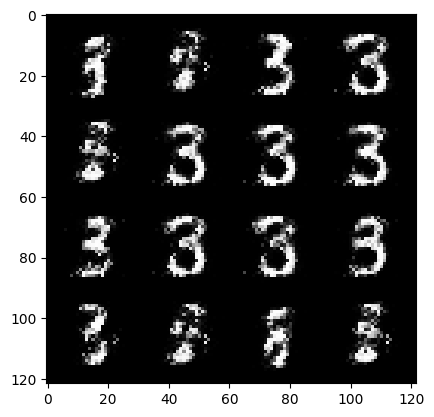

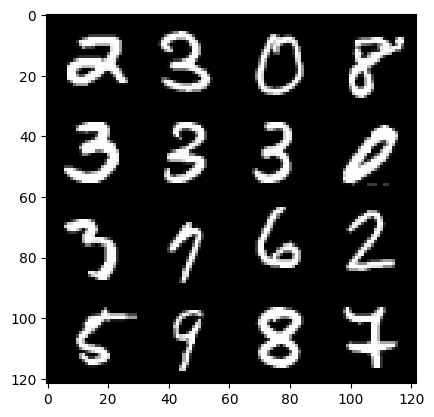

epoch : 41 | step : 19500 | Gen loss : 5.518539751370747 | Disc loss : 0.03643393796092519


  0%|          | 0/469 [00:00<?, ?it/s]

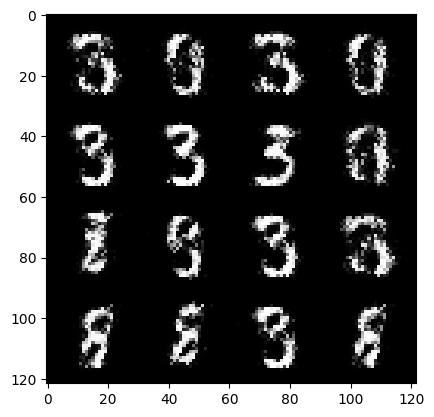

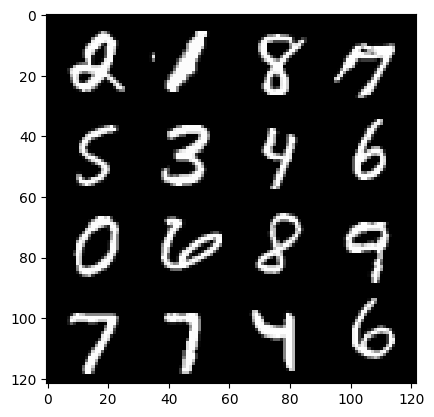

epoch : 42 | step : 19800 | Gen loss : 5.74980391025543 | Disc loss : 0.03699968536229181


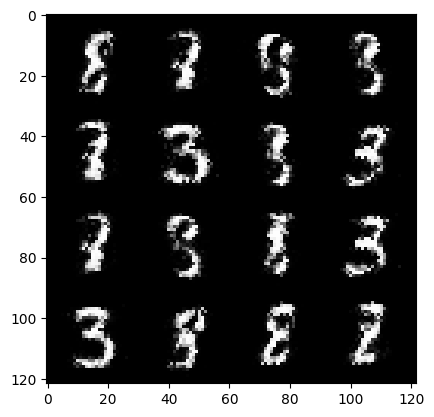

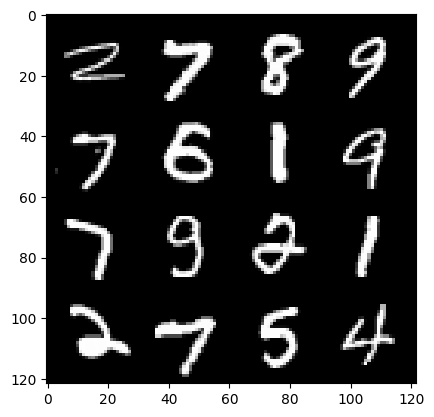

epoch : 42 | step : 20100 | Gen loss : 5.6402242199579895 | Disc loss : 0.03735260884898404


  0%|          | 0/469 [00:00<?, ?it/s]

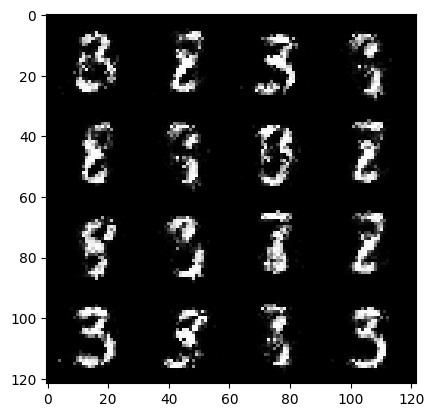

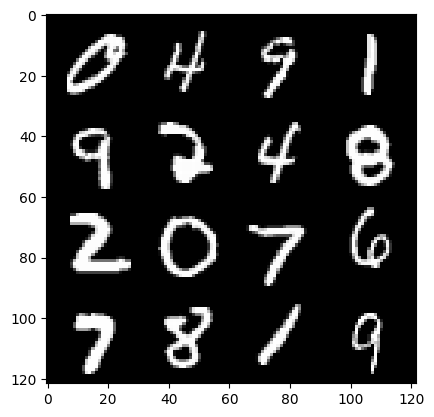

epoch : 43 | step : 20400 | Gen loss : 5.656241518656414 | Disc loss : 0.031482603421124335


  0%|          | 0/469 [00:00<?, ?it/s]

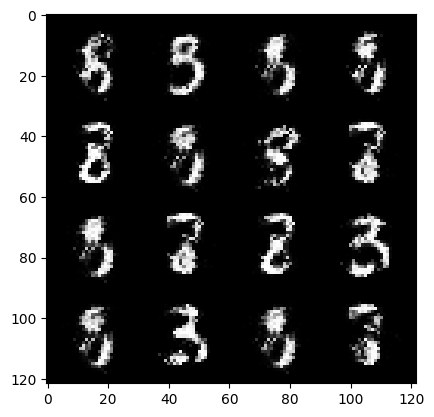

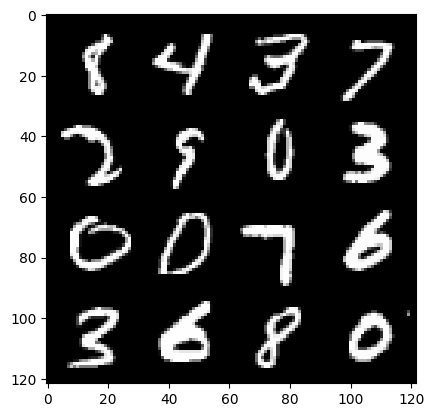

epoch : 44 | step : 20700 | Gen loss : 5.487898057301838 | Disc loss : 0.035315042482689005


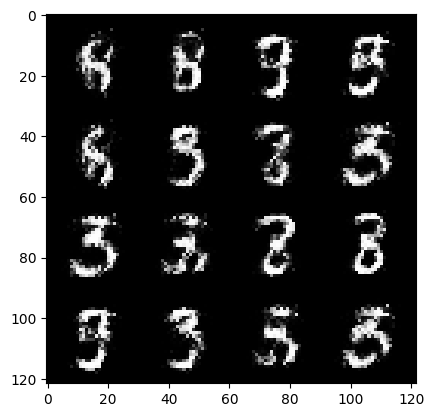

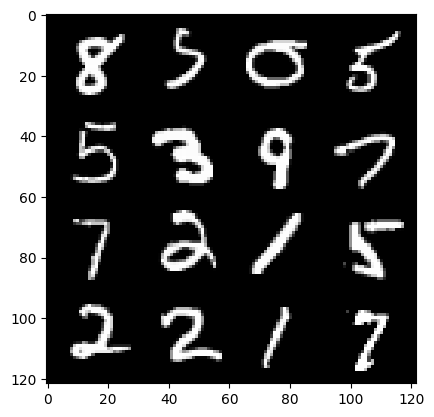

epoch : 44 | step : 21000 | Gen loss : 5.8478678099314365 | Disc loss : 0.04107765866909176


  0%|          | 0/469 [00:00<?, ?it/s]

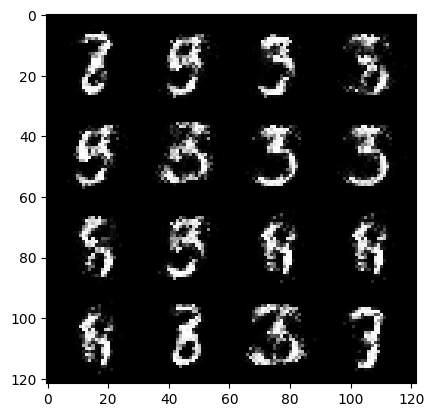

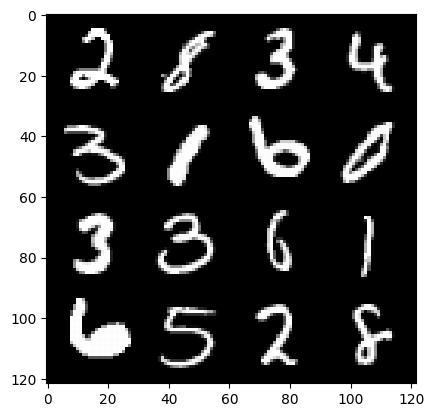

epoch : 45 | step : 21300 | Gen loss : 6.036899169286095 | Disc loss : 0.036486316641482205


  0%|          | 0/469 [00:00<?, ?it/s]

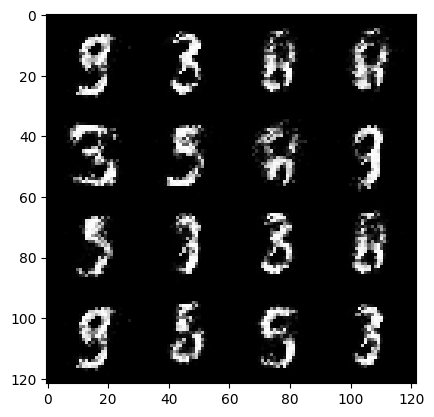

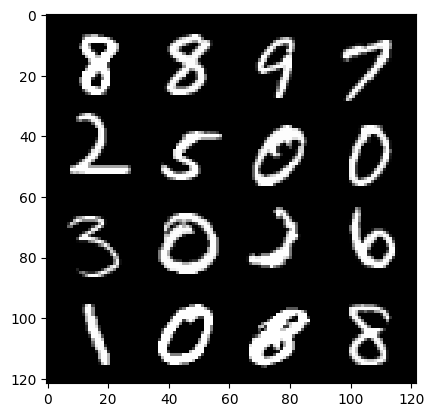

epoch : 46 | step : 21600 | Gen loss : 5.814104723930362 | Disc loss : 0.04418763849884267


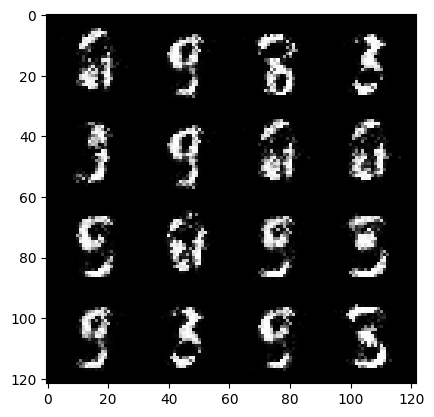

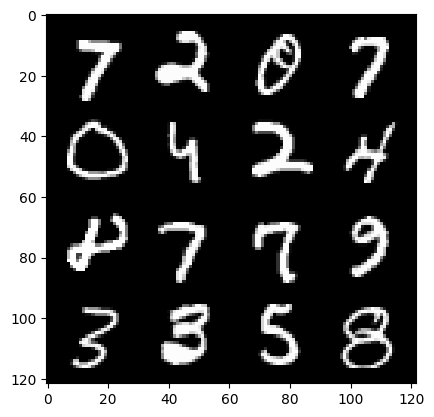

epoch : 46 | step : 21900 | Gen loss : 5.456121598084764 | Disc loss : 0.047300195479765494


  0%|          | 0/469 [00:00<?, ?it/s]

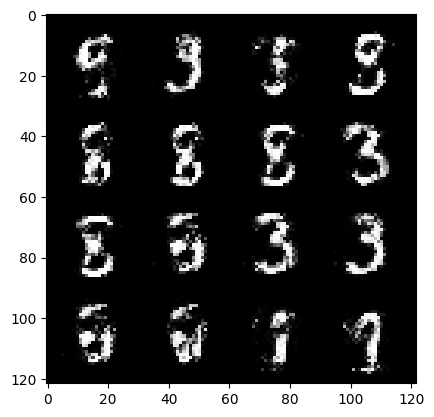

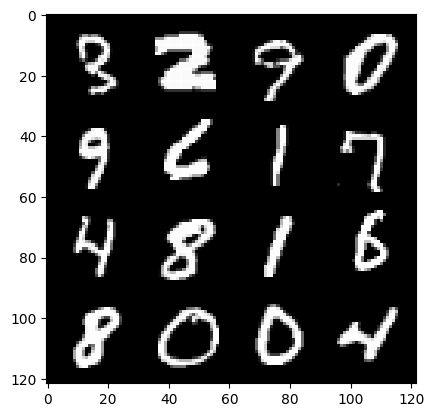

epoch : 47 | step : 22200 | Gen loss : 5.926843047142034 | Disc loss : 0.046059895930811764


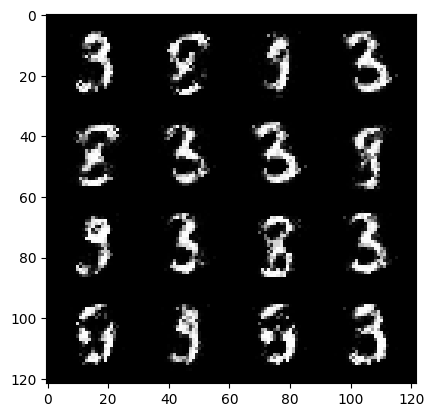

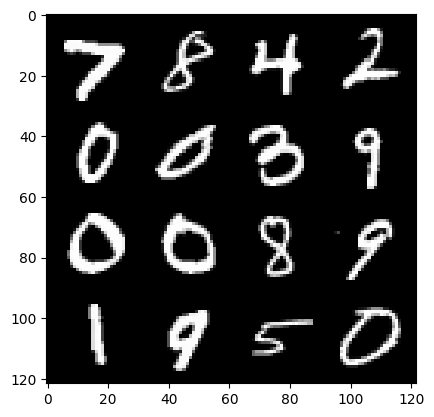

epoch : 47 | step : 22500 | Gen loss : 5.6614300998051945 | Disc loss : 0.0487033378363897


  0%|          | 0/469 [00:00<?, ?it/s]

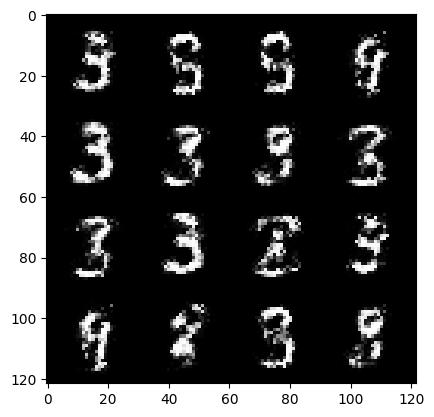

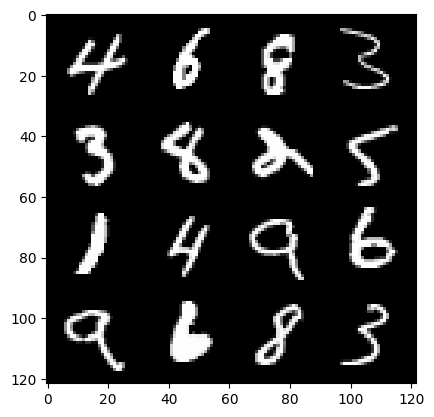

epoch : 48 | step : 22800 | Gen loss : 5.202255260149638 | Disc loss : 0.04851922327963018


  0%|          | 0/469 [00:00<?, ?it/s]

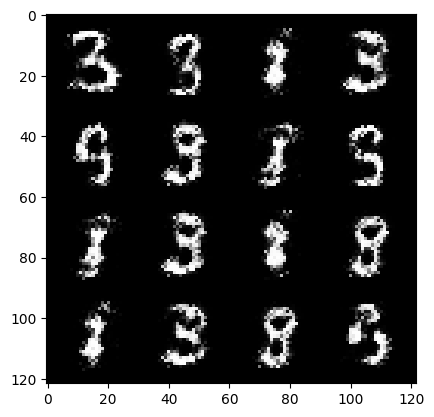

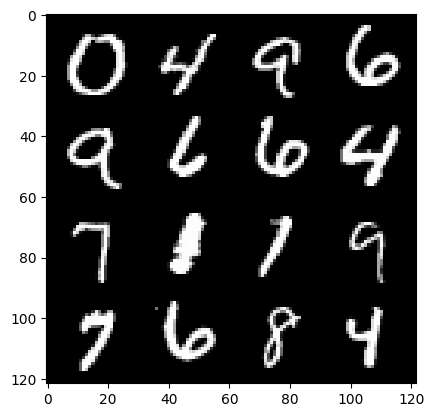

epoch : 49 | step : 23100 | Gen loss : 5.285187342166902 | Disc loss : 0.04307539739646017


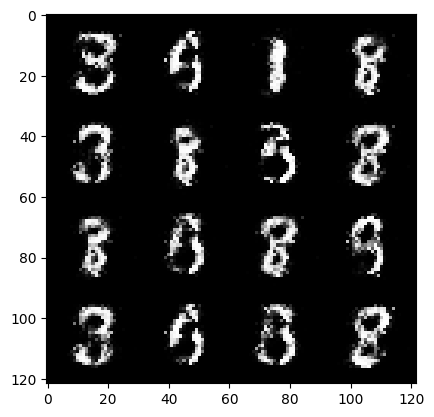

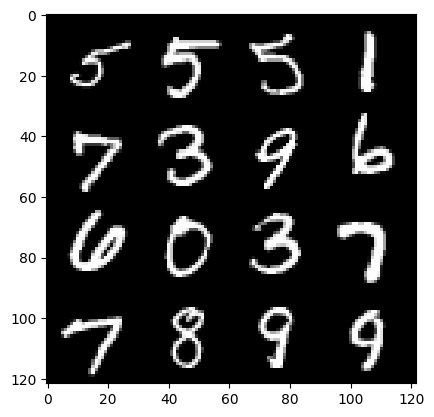

epoch : 49 | step : 23400 | Gen loss : 5.287507295608519 | Disc loss : 0.038642752524465314


  0%|          | 0/469 [00:00<?, ?it/s]

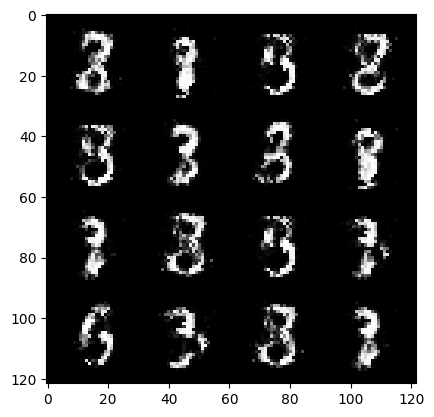

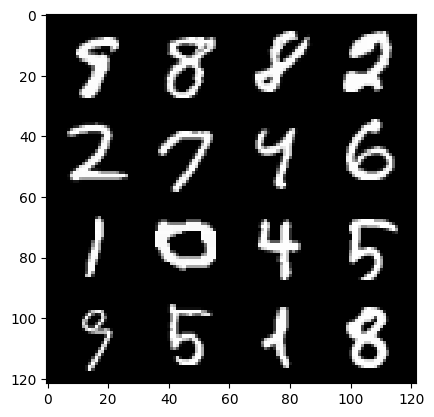

epoch : 50 | step : 23700 | Gen loss : 5.681509764989213 | Disc loss : 0.045533074694685635


  0%|          | 0/469 [00:00<?, ?it/s]

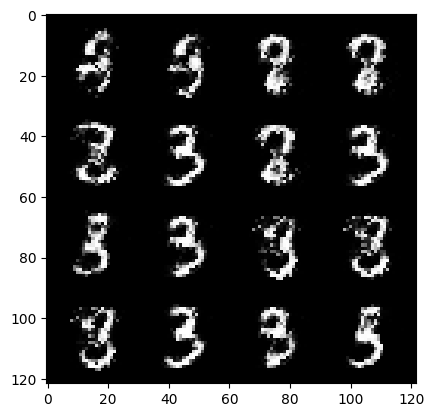

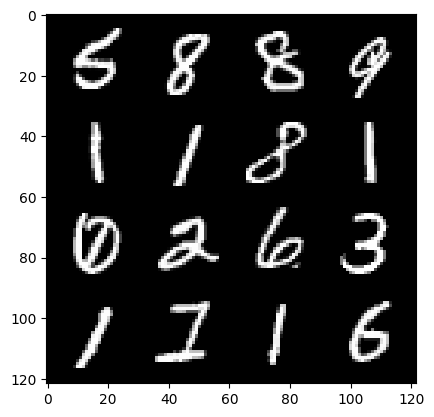

epoch : 51 | step : 24000 | Gen loss : 5.415446461041772 | Disc loss : 0.05223286994112036


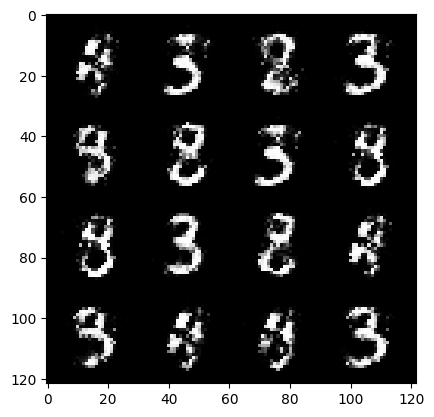

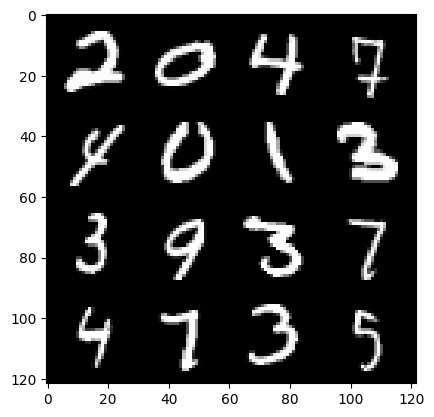

epoch : 51 | step : 24300 | Gen loss : 5.049008987744649 | Disc loss : 0.04471332237745325


  0%|          | 0/469 [00:00<?, ?it/s]

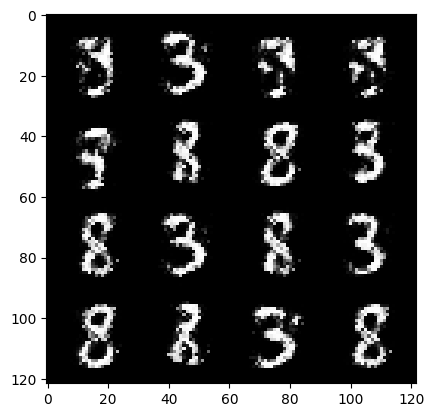

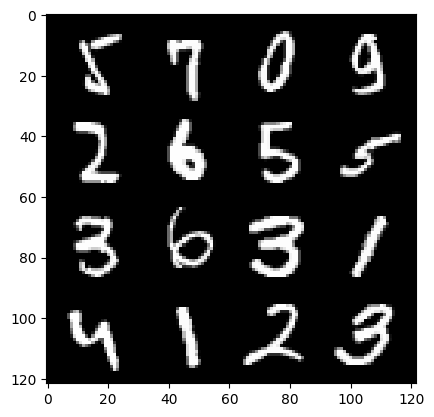

epoch : 52 | step : 24600 | Gen loss : 5.2435378702481605 | Disc loss : 0.057185543651382134


  0%|          | 0/469 [00:00<?, ?it/s]

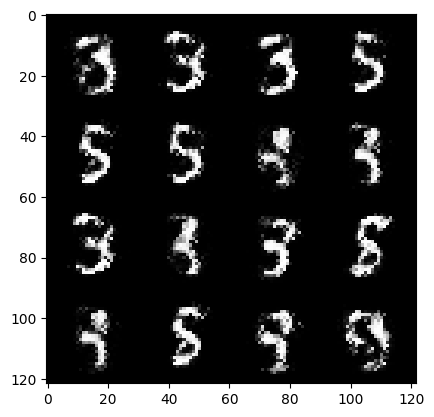

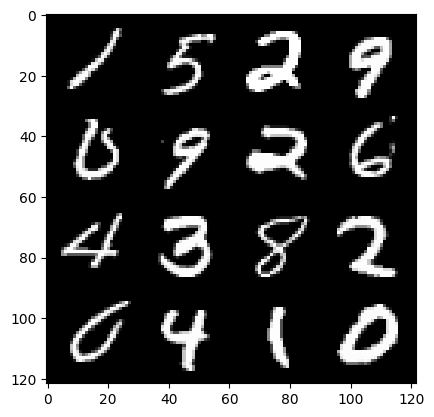

epoch : 53 | step : 24900 | Gen loss : 5.250093315442406 | Disc loss : 0.05361919605483618


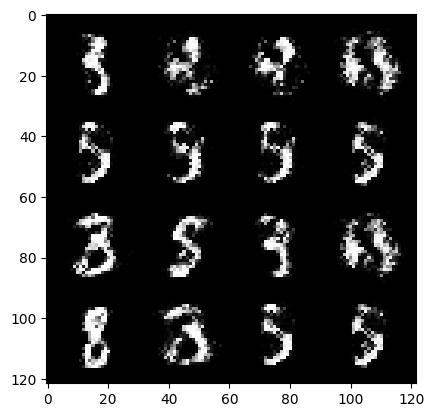

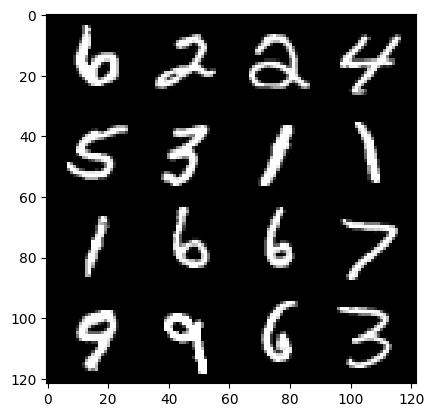

epoch : 53 | step : 25200 | Gen loss : 5.478803996245068 | Disc loss : 0.0509312847815454


  0%|          | 0/469 [00:00<?, ?it/s]

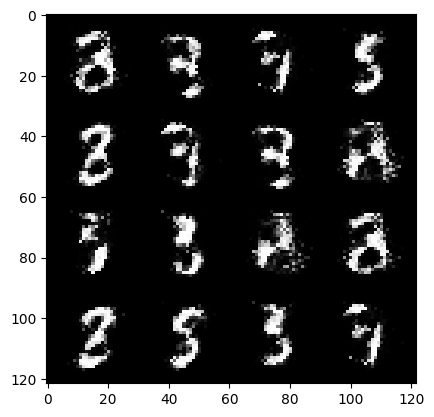

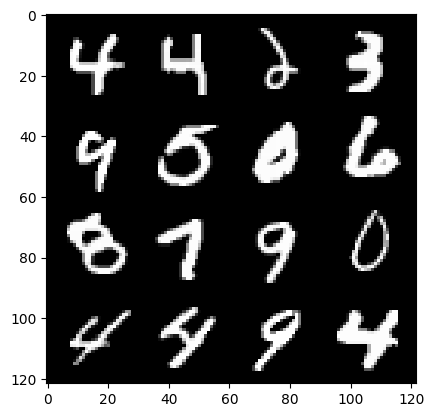

epoch : 54 | step : 25500 | Gen loss : 5.064970875581107 | Disc loss : 0.048263092106208175


  0%|          | 0/469 [00:00<?, ?it/s]

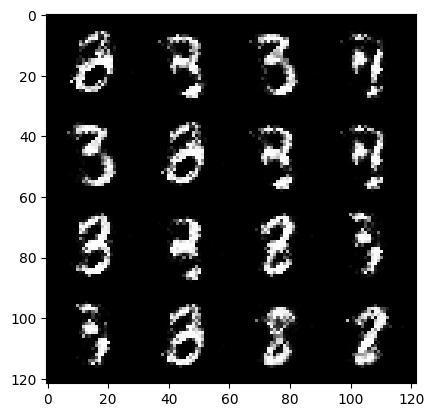

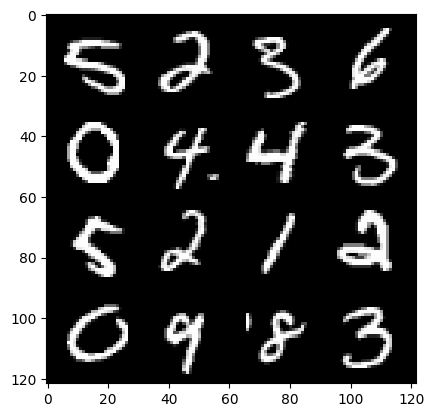

epoch : 55 | step : 25800 | Gen loss : 5.198719844023386 | Disc loss : 0.04444294331284861


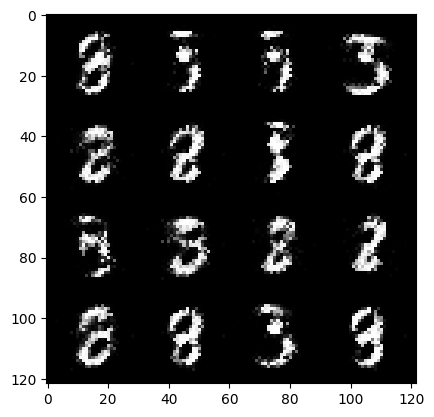

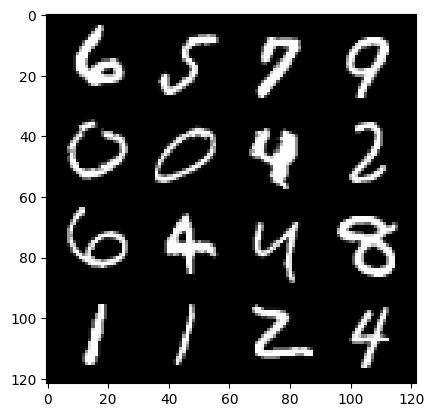

epoch : 55 | step : 26100 | Gen loss : 5.665831174850467 | Disc loss : 0.03540093816972026


  0%|          | 0/469 [00:00<?, ?it/s]

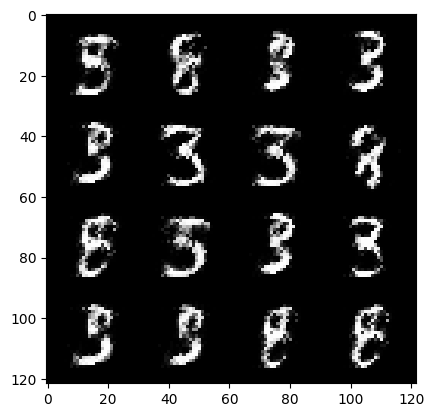

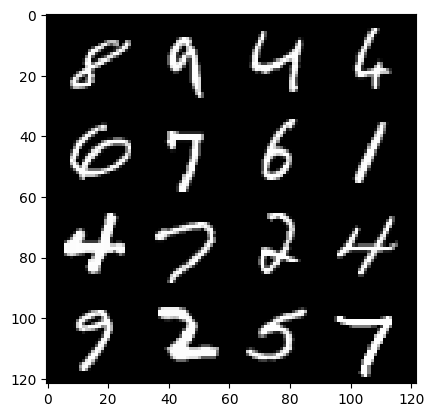

epoch : 56 | step : 26400 | Gen loss : 5.525456666946409 | Disc loss : 0.052297420895968894


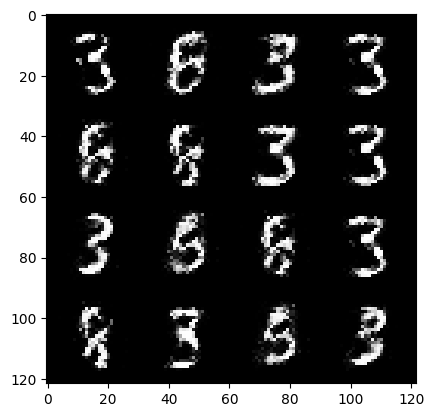

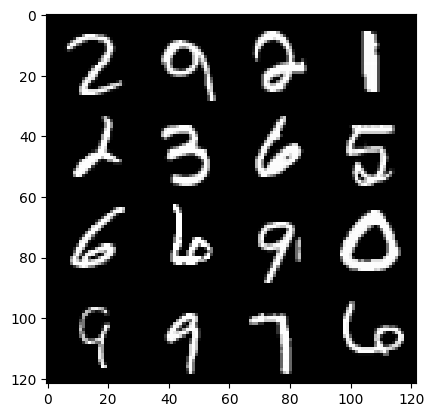

epoch : 56 | step : 26700 | Gen loss : 5.061540799935657 | Disc loss : 0.04675293186834708


  0%|          | 0/469 [00:00<?, ?it/s]

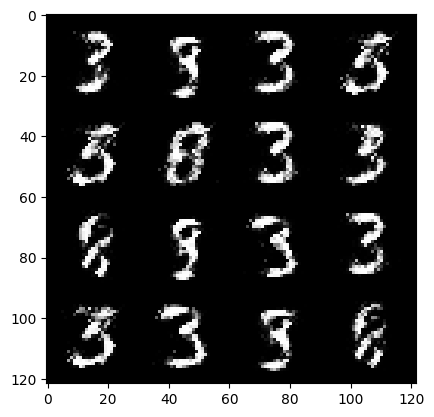

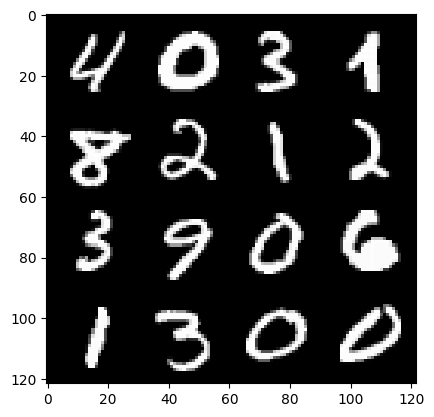

epoch : 57 | step : 27000 | Gen loss : 5.421424226760861 | Disc loss : 0.04526009118805327


  0%|          | 0/469 [00:00<?, ?it/s]

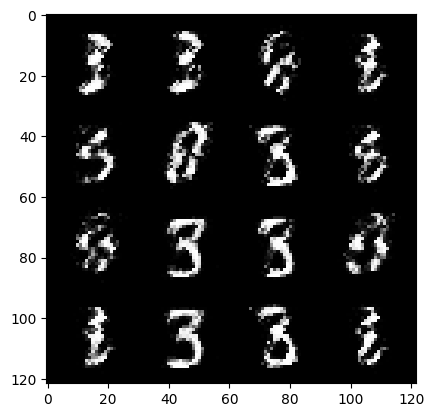

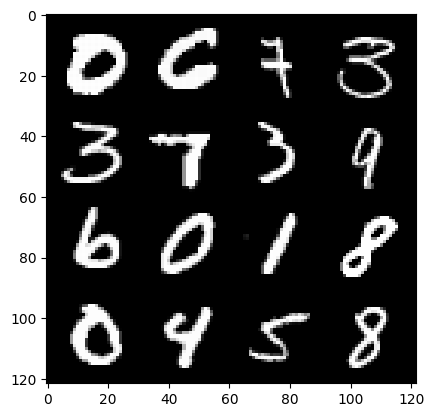

epoch : 58 | step : 27300 | Gen loss : 5.378964034716289 | Disc loss : 0.046633495977148415


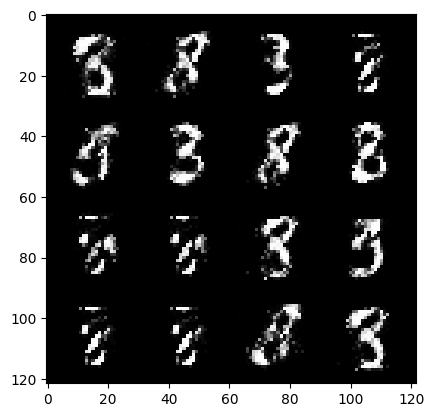

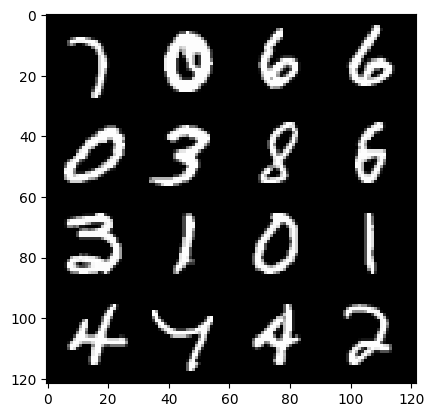

epoch : 58 | step : 27600 | Gen loss : 5.443331718444821 | Disc loss : 0.05673381685900193


  0%|          | 0/469 [00:00<?, ?it/s]

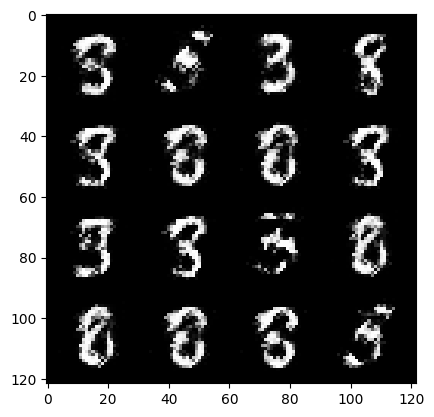

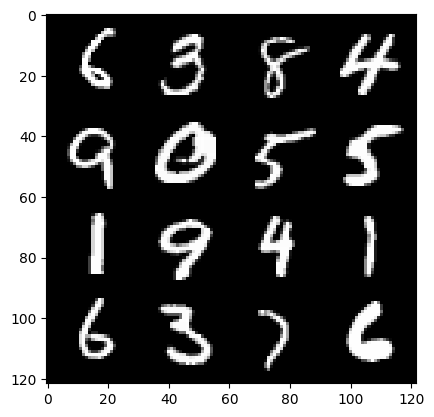

epoch : 59 | step : 27900 | Gen loss : 5.146806365648903 | Disc loss : 0.06058720696251835


  0%|          | 0/469 [00:00<?, ?it/s]

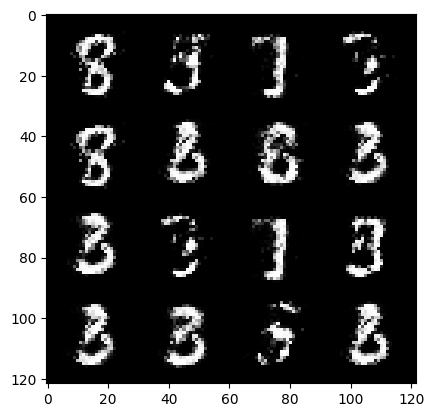

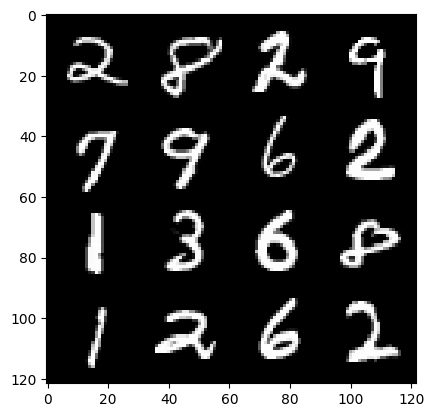

epoch : 60 | step : 28200 | Gen loss : 5.517935411135353 | Disc loss : 0.05760117591513945


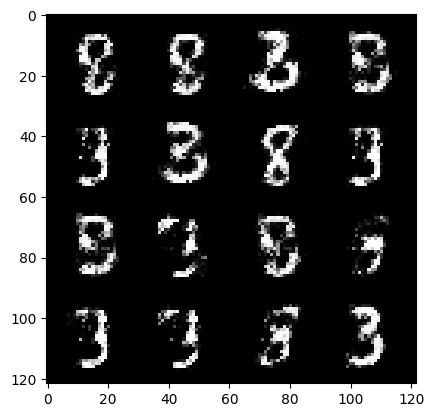

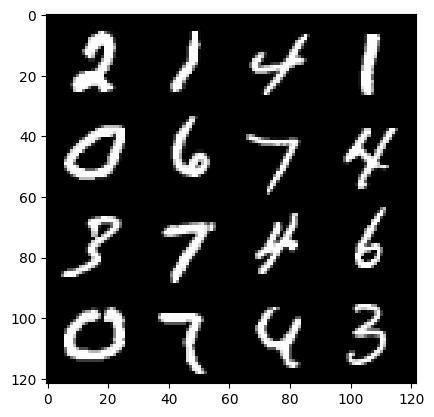

epoch : 60 | step : 28500 | Gen loss : 5.593423690795895 | Disc loss : 0.0454798282403499


  0%|          | 0/469 [00:00<?, ?it/s]

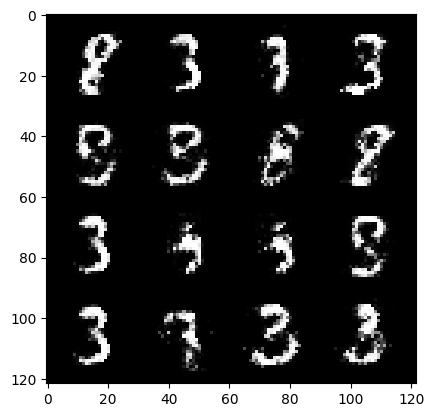

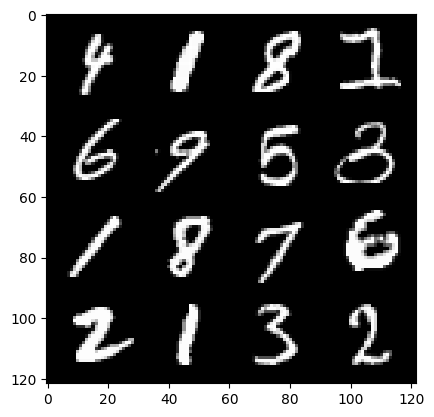

epoch : 61 | step : 28800 | Gen loss : 5.584146946271263 | Disc loss : 0.05323189303278922


  0%|          | 0/469 [00:00<?, ?it/s]

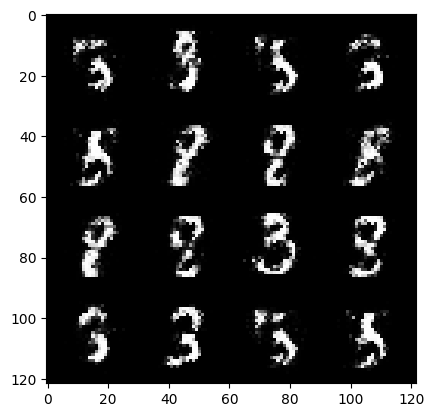

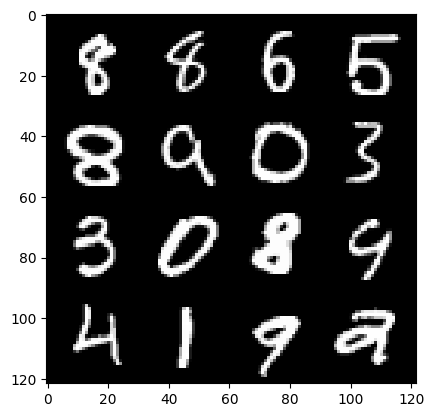

epoch : 62 | step : 29100 | Gen loss : 5.293257821400965 | Disc loss : 0.05364185469225051


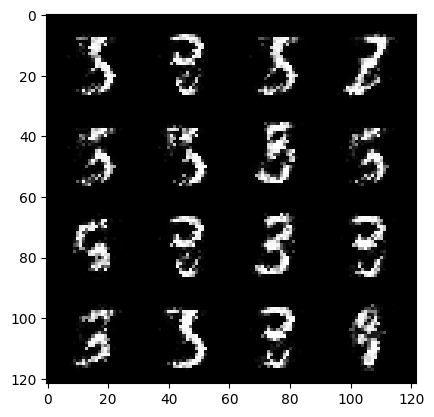

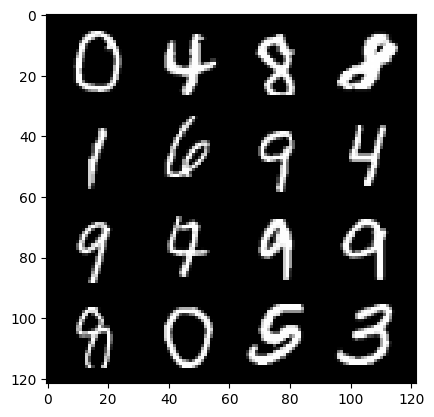

epoch : 62 | step : 29400 | Gen loss : 5.170270534356437 | Disc loss : 0.05324626506771895


  0%|          | 0/469 [00:00<?, ?it/s]

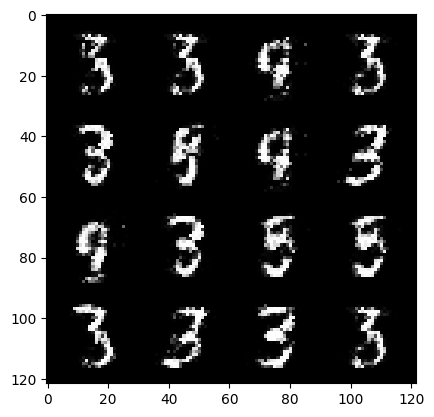

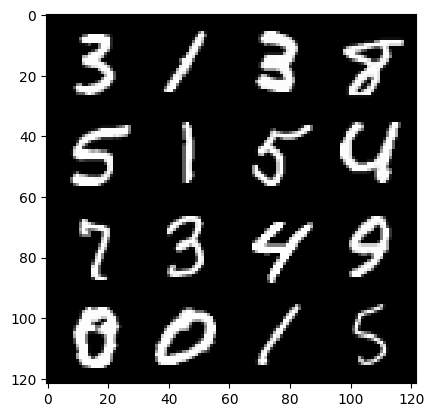

epoch : 63 | step : 29700 | Gen loss : 4.977023430665333 | Disc loss : 0.06111059387524926


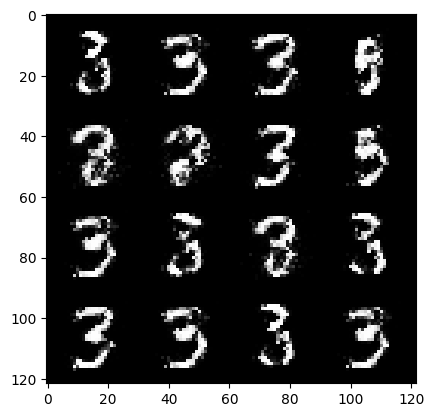

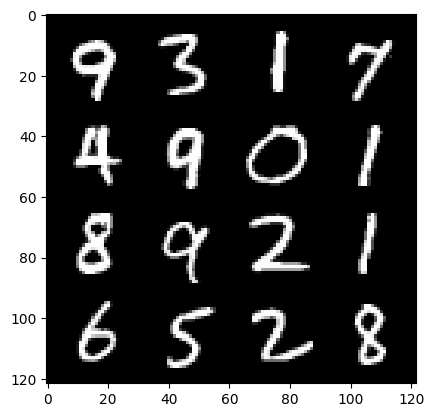

epoch : 63 | step : 30000 | Gen loss : 5.370432755152385 | Disc loss : 0.058479932363455514


  0%|          | 0/469 [00:00<?, ?it/s]

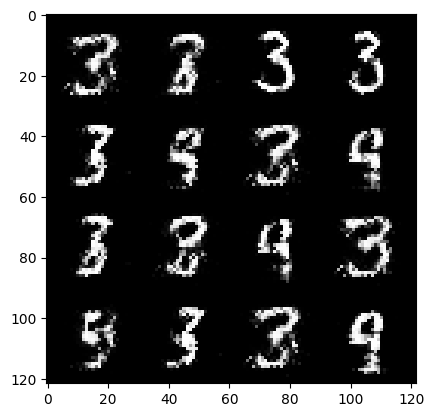

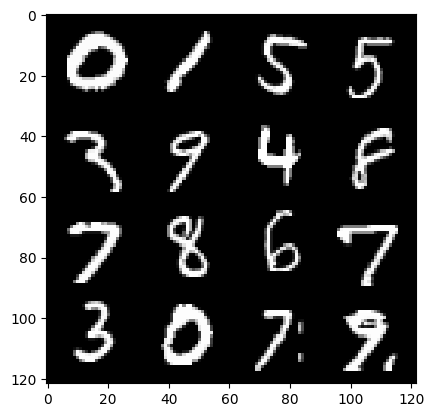

epoch : 64 | step : 30300 | Gen loss : 5.404481414159139 | Disc loss : 0.05921246883148945


  0%|          | 0/469 [00:00<?, ?it/s]

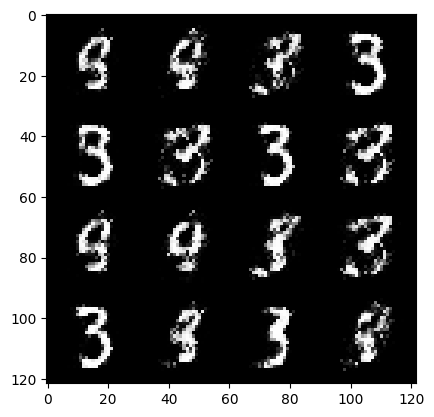

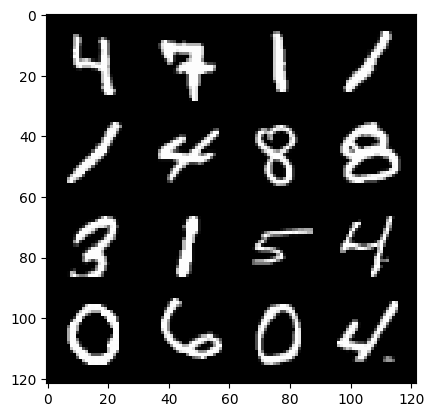

epoch : 65 | step : 30600 | Gen loss : 5.317064718405406 | Disc loss : 0.06590107838623226


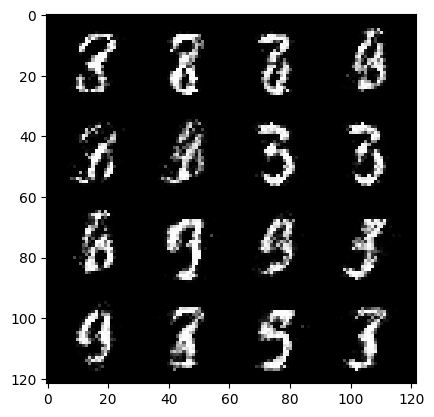

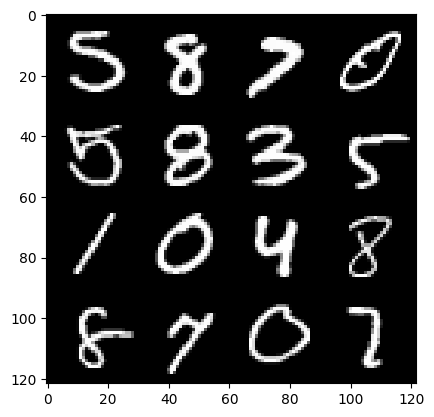

epoch : 65 | step : 30900 | Gen loss : 5.161631278991704 | Disc loss : 0.0720806846860797


  0%|          | 0/469 [00:00<?, ?it/s]

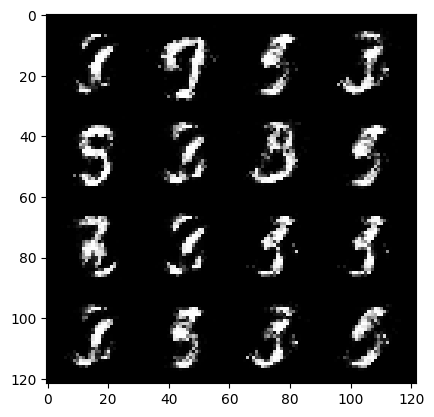

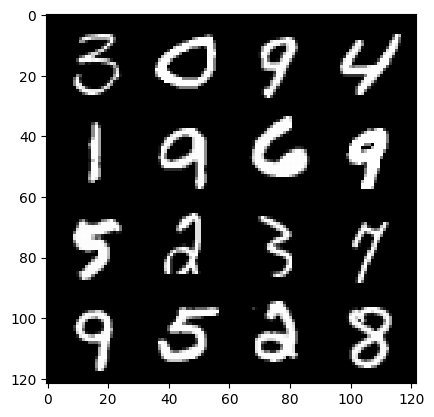

epoch : 66 | step : 31200 | Gen loss : 5.028378077348071 | Disc loss : 0.07329913623010122


  0%|          | 0/469 [00:00<?, ?it/s]

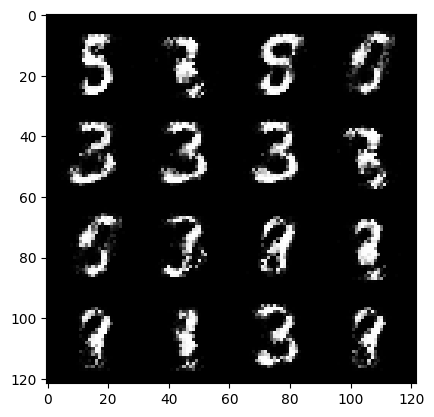

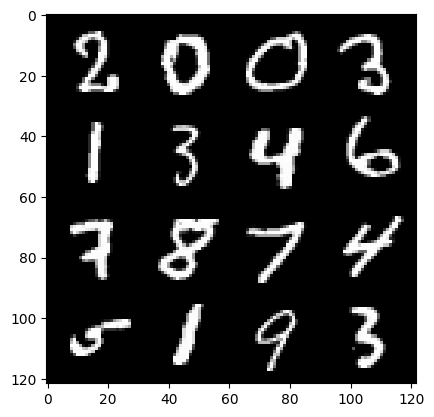

epoch : 67 | step : 31500 | Gen loss : 4.7963525756200145 | Disc loss : 0.07886445220559841


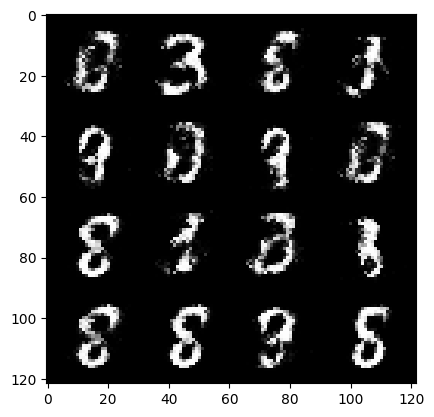

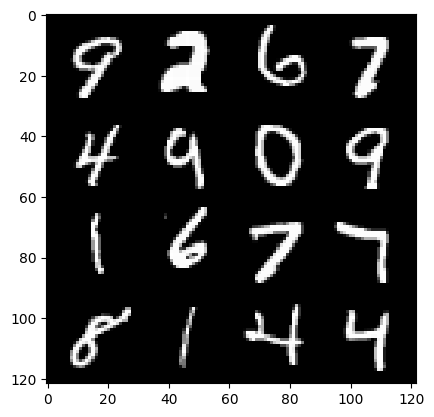

epoch : 67 | step : 31800 | Gen loss : 4.561679604053497 | Disc loss : 0.08675332147007193


  0%|          | 0/469 [00:00<?, ?it/s]

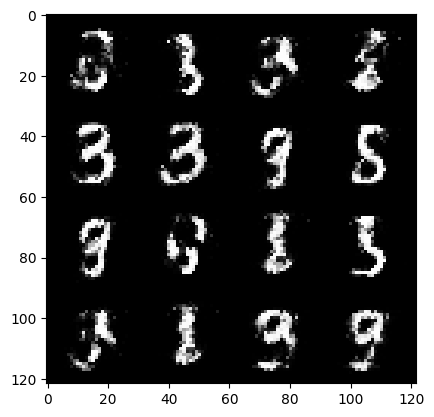

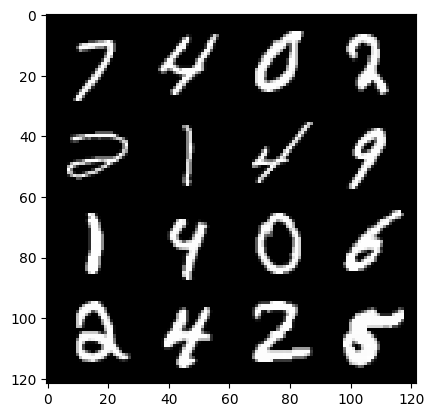

epoch : 68 | step : 32100 | Gen loss : 4.567292571067812 | Disc loss : 0.07935587375735248


  0%|          | 0/469 [00:00<?, ?it/s]

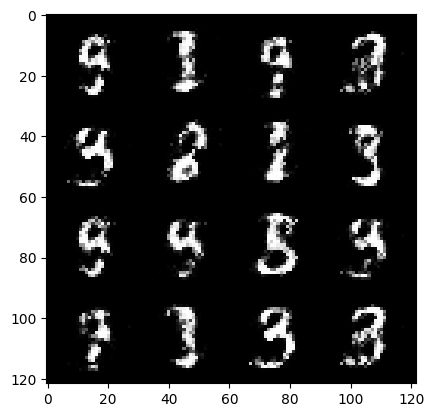

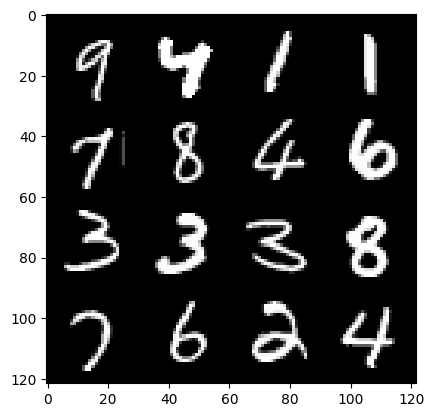

epoch : 69 | step : 32400 | Gen loss : 4.576291430791223 | Disc loss : 0.07581521000713107


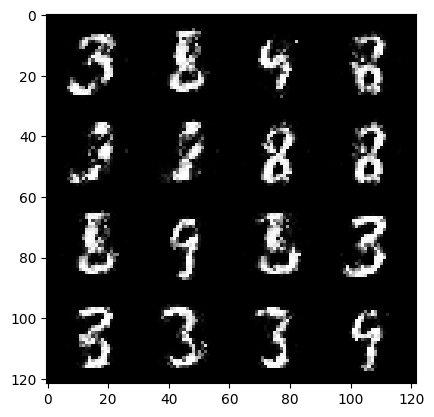

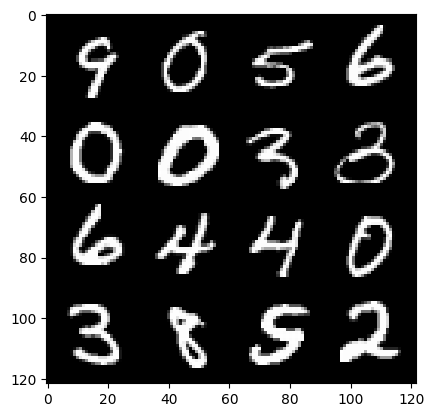

epoch : 69 | step : 32700 | Gen loss : 4.3137158767382315 | Disc loss : 0.0934761597340307


  0%|          | 0/469 [00:00<?, ?it/s]

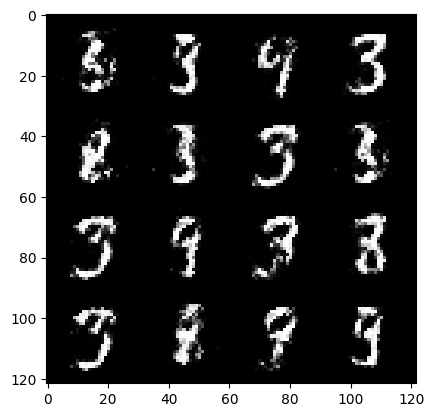

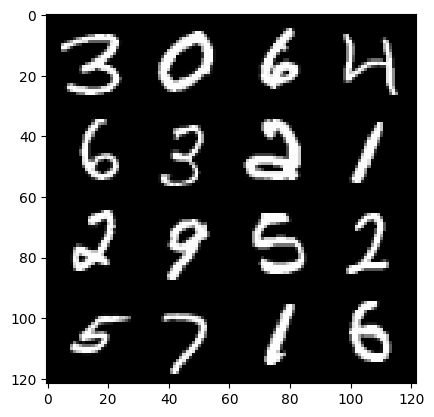

epoch : 70 | step : 33000 | Gen loss : 4.6934939392407715 | Disc loss : 0.09119624811535089


  0%|          | 0/469 [00:00<?, ?it/s]

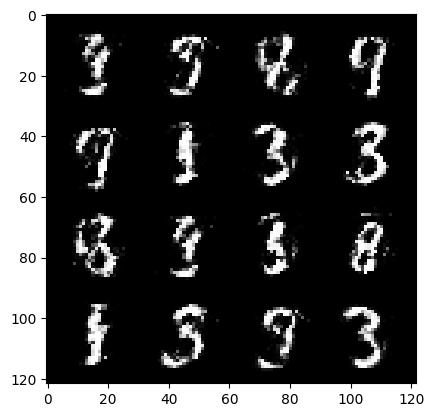

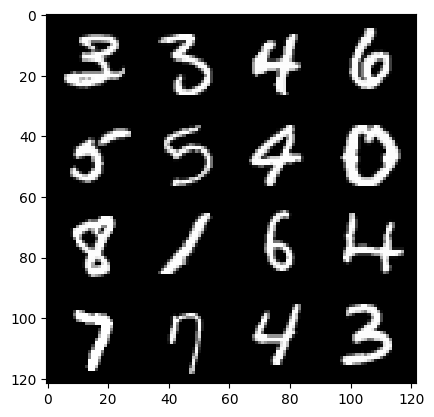

epoch : 71 | step : 33300 | Gen loss : 4.536490074793495 | Disc loss : 0.07864812132592003


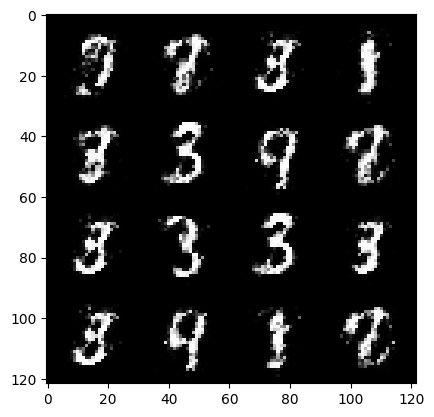

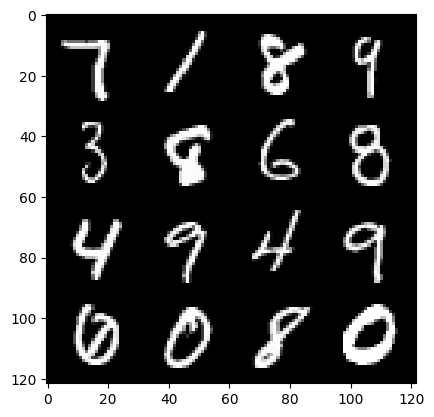

epoch : 71 | step : 33600 | Gen loss : 4.601222126483922 | Disc loss : 0.06778853299717111


  0%|          | 0/469 [00:00<?, ?it/s]

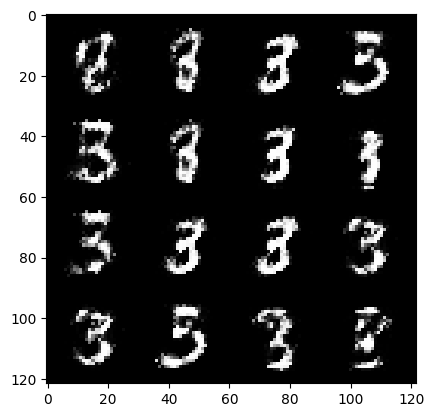

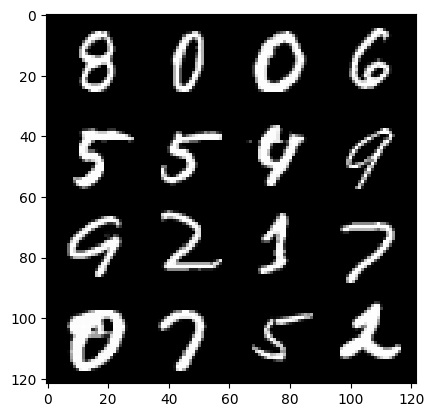

epoch : 72 | step : 33900 | Gen loss : 4.570524202187861 | Disc loss : 0.08639384236807618


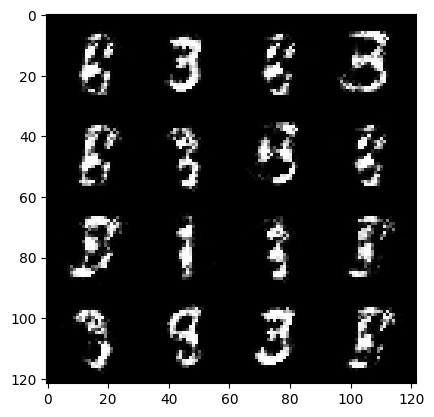

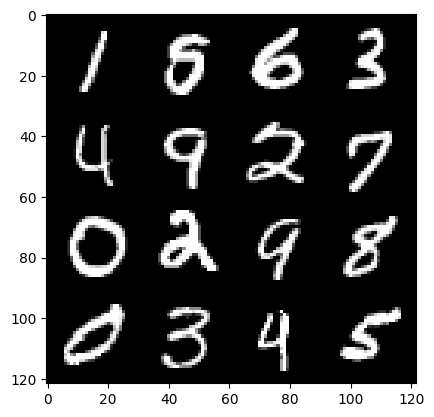

epoch : 72 | step : 34200 | Gen loss : 4.635979424317679 | Disc loss : 0.08449497339626155


  0%|          | 0/469 [00:00<?, ?it/s]

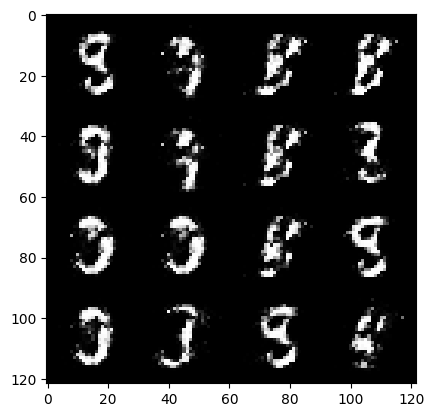

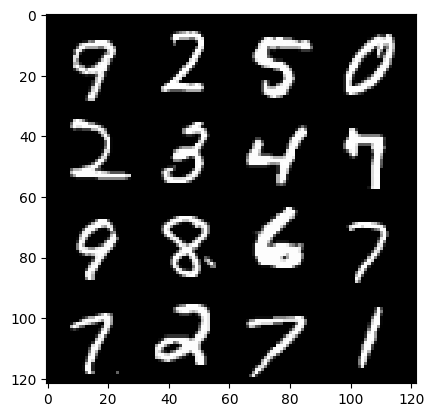

epoch : 73 | step : 34500 | Gen loss : 4.462946070035296 | Disc loss : 0.08092022635663543


  0%|          | 0/469 [00:00<?, ?it/s]

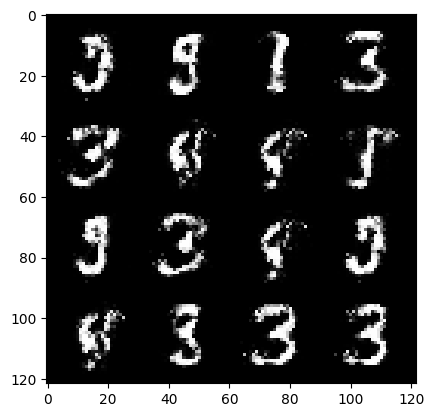

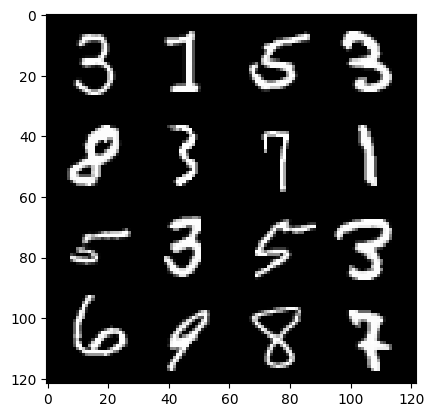

epoch : 74 | step : 34800 | Gen loss : 4.6668721580505395 | Disc loss : 0.0728744997829199


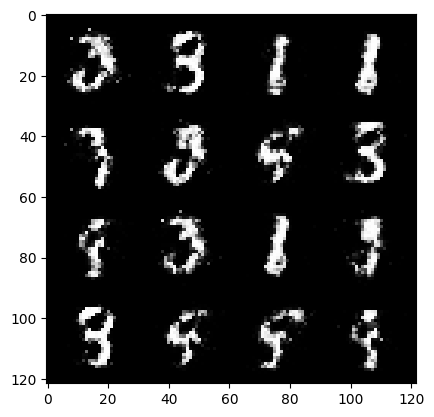

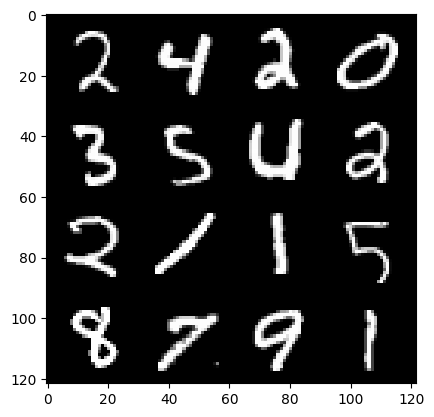

epoch : 74 | step : 35100 | Gen loss : 4.695087402661642 | Disc loss : 0.08854173373430965


  0%|          | 0/469 [00:00<?, ?it/s]

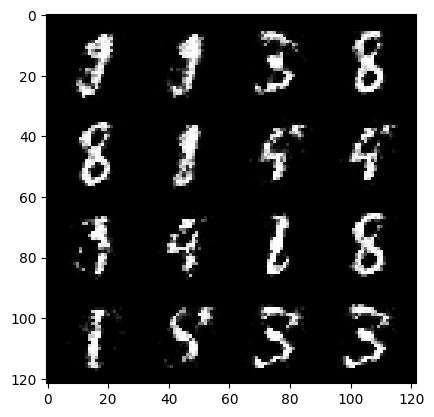

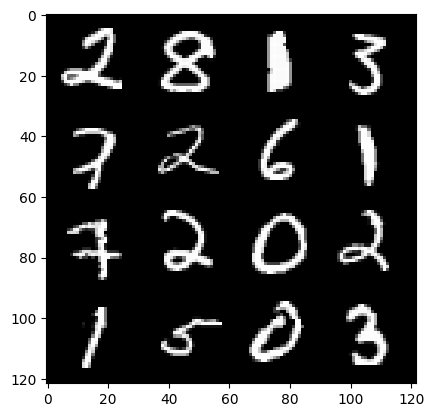

epoch : 75 | step : 35400 | Gen loss : 4.497039298216503 | Disc loss : 0.08751465409994129


  0%|          | 0/469 [00:00<?, ?it/s]

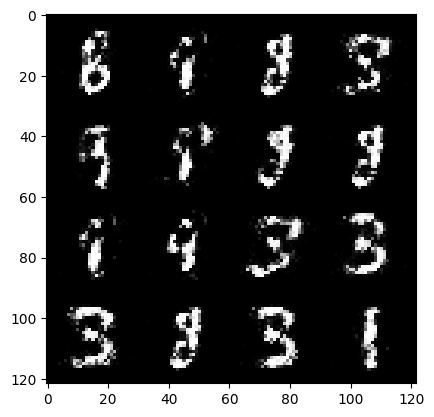

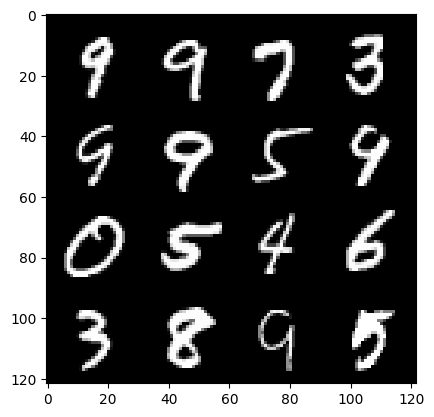

epoch : 76 | step : 35700 | Gen loss : 4.508219464619953 | Disc loss : 0.08217108557000755


In [ ]:
for epoch in range(epochs):
  for real,_ in tqdm(dataloader):
    # discriminator
    disc_optim.zero_grad()
    curr_bs = len(real)
    real = real.to(device)
    real = real.view(curr_bs,-1)

    disc_loss = calc_disc_loss(loss_func,gen,disc,bs,z_dim,real)
    disc_loss.backward(retain_graph= True)
    disc_optim.step()

    #generator
    gen_optim.zero_grad()
    gen_loss = calc_gen_loss(loss_func,gen,disc,bs,z_dim)
    gen_loss.backward(retain_graph= True)
    gen_optim.step()

    #visualization & stats
    mean_disc_loss += disc_loss.item()/ info_step
    mean_gen_loss += gen_loss.item()/ info_step


    if cur_step % info_step == 0 and cur_step > 0:
      noise = gen_noise(bs,z_dim)
      fake = gen(noise)
      show(fake)
      show(real)
      print(f"epoch : {epoch} | step : {cur_step} | Gen loss : {mean_gen_loss} | Disc loss : {mean_disc_loss}")
      mean_disc_loss,mean_gen_loss = 0,0
    cur_step+=1




